Using skopt-gpu for Bayesian Optimization with SVM
Following your preference for skopt-gpu, here's how you can modify your code to leverage GPU acceleration for your SVM hyperparameter tuning:

1. Install skopt-gpu:

Make sure you have a CUDA-enabled Nvidia GPU and the appropriate drivers installed. Then, install skopt-gpu using pip:

Bash
pip install skopt-gpu
Use code with caution. Learn more
2. Import Libraries:

Modify your imports to include skopt-gpu and ensure you're using CUDA-compatible Scikit-learn and NumPy versions:

Python
from skopt.gpu import BayesSearchCV
from sklearn.svm import SVC
import numpy as np
Use code with caution. Learn more
3. Configure GPU Memory:

Allocate an appropriate amount of GPU memory for the search. You can set the gpu_device and gpu_memory parameters in BayesSearchCV:

Python
gpu_device = 0  # Select the relevant GPU device ID
gpu_memory = 4096  # Allocate 4GB of memory in MB

bayes_search = BayesSearchCV(
    estimator=SVC(),
    param_space=param_space,
    cv=10,
    n_iter=50,
    random_state=42,
    n_jobs=-1,
    gpu_device=gpu_device,
    gpu_memory=gpu_memory,
)
Use code with caution. Learn more
4. Run the Search:

Fit the model on your training data as before:

Python
bayes_search.fit(x_train, y_train)
Use code with caution. Learn more
5. Analyze Results:

Print the best parameters and score:

Python
print('Best Parameters:', bayes_search.best_params_)
print('Best Score (Accuracy):', bayes_search.best_score_)
Use code with caution. Learn more
Benefits:

Utilizing GPU acceleration through CUDA should significantly speed up the Bayesian search process compared to the CPU-based approach.
The familiar syntax and integration with Scikit-learn make the transition from skopt to skopt-gpu seamless.
Remember:

Adjust the gpu_memory allocation based on your available GPU memory and task requirements.
Monitor resource usage to ensure your system isn't overloaded.
By incorporating these changes, you can effectively leverage skopt-gpu for faster and more efficient Bayesian optimization for your SVM hyperparameter tuning.

I hope this helps! Feel free to ask if you have any further questions or need assistance with specific implementation details.Using skopt-gpu for Bayesian Optimization with SVM
Following your preference for skopt-gpu, here's how you can modify your code to leverage GPU acceleration for your SVM hyperparameter tuning:

1. Install skopt-gpu:

Make sure you have a CUDA-enabled Nvidia GPU and the appropriate drivers installed. Then, install skopt-gpu using pip:

Bash
pip install skopt-gpu
Use code with caution. Learn more
2. Import Libraries:

Modify your imports to include skopt-gpu and ensure you're using CUDA-compatible Scikit-learn and NumPy versions:

Python
from skopt.gpu import BayesSearchCV
from sklearn.svm import SVC
import numpy as np
Use code with caution. Learn more
3. Configure GPU Memory:

Allocate an appropriate amount of GPU memory for the search. You can set the gpu_device and gpu_memory parameters in BayesSearchCV:

Python
gpu_device = 0  # Select the relevant GPU device ID
gpu_memory = 4096  # Allocate 4GB of memory in MB

bayes_search = BayesSearchCV(
    estimator=SVC(),
    param_space=param_space,
    cv=10,
    n_iter=50,
    random_state=42,
    n_jobs=-1,
    gpu_device=gpu_device,
    gpu_memory=gpu_memory,
)
Use code with caution. Learn more
4. Run the Search:

Fit the model on your training data as before:

Python
bayes_search.fit(x_train, y_train)
Use code with caution. Learn more
5. Analyze Results:

Print the best parameters and score:

Python
print('Best Parameters:', bayes_search.best_params_)
print('Best Score (Accuracy):', bayes_search.best_score_)
Use code with caution. Learn more
Benefits:

Utilizing GPU acceleration through CUDA should significantly speed up the Bayesian search process compared to the CPU-based approach.
The familiar syntax and integration with Scikit-learn make the transition from skopt to skopt-gpu seamless.
Remember:

Adjust the gpu_memory allocation based on your available GPU memory and task requirements.
Monitor resource usage to ensure your system isn't overloaded.
By incorporating these changes, you can effectively leverage skopt-gpu for faster and more efficient Bayesian optimization for your SVM hyperparameter tuning.

I hope this helps! Feel free to ask if you have any further questions or need assistance with specific implementation details.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import os
import warnings
import numpy as np
%matplotlib inline

pd.set_option('Display.max_rows',None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

Dataset description

| Column Name                                 | Description                                                                          |
|---------------------------------------------|--------------------------------------------------------------------------------------|
| Manufacturer                                | The company that produced the vehicle.                                               |
| Model Year                                  | The year in which the vehicle model was manufactured.                                |
| Regulatory Class                            | The regulatory category under which the vehicle falls (e.g., Passenger Car, Light Truck). |
| Vehicle Type                                | The type of vehicle (e.g., Sedan, SUV, Truck).                                        |
| Production (000)                            | The production volume of the vehicle model in thousands.                              |
| Production Share                            | The percentage share of this vehicle model in total production.                       |
| 2-Cycle MPG                                 | The vehicle's fuel efficiency as per 2-cycle testing method.                          |
| Real-World MPG                              | The vehicle's fuel efficiency in real-world driving conditions.                       |
| Real-World MPG_City                         | The vehicle's fuel efficiency in city driving conditions in real-world.               |
| Real-World MPG_Hwy                          | The vehicle's fuel efficiency in highway driving conditions in real-world.            |
| Real-World CO2 (g/mi)                       | The amount of CO2 emissions produced by the vehicle per mile in real-world conditions. |
| Real-World CO2_City (g/mi)                  | The amount of CO2 emissions produced by the vehicle per mile in city driving conditions.|
| Real-World CO2_Hwy (g/mi)                   | The amount of CO2 emissions produced by the vehicle per mile in highway driving conditions.|
| Weight (lbs)                                | The weight of the vehicle in pounds.                                                  |
| Footprint (sq. ft.)                         | The vehicle's footprint in square feet, a measure of its size.                        |
| Engine Displacement                         | The displacement volume of the vehicle's engine, usually in liters.                   |
| Horsepower (HP)                             | The power output of the vehicle's engine in horsepower.                               |
| Acceleration (0-60 time in seconds)         | The time it takes for the vehicle to accelerate from 0 to 60 miles per hour.          |
| HP/Engine Displacement                      | The ratio of horsepower to engine displacement.                                       |
| HP/Weight (lbs)                             | The ratio of horsepower to the vehicle's weight.                                      |
| Ton-MPG (Real-World)                        | The vehicle's fuel efficiency in ton-miles per gallon in real-world conditions.       |
| Drivetrain - Front                          | Indicates if the vehicle has front-wheel drive.                                       |
| Drivetrain - 4WD                            | Indicates if the vehicle has four-wheel drive.                                        |
| Drivetrain - Rear                           | Indicates if the vehicle has rear-wheel drive.                                        |
| Transmission - Manual                       | Indicates if the vehicle has a manual transmission.                                   |
| Transmission - Automatic                    | Indicates if the vehicle has an automatic transmission.                               |
| Transmission - Lockup                       | Indicates if the vehicle has a lockup transmission.                                   |
| Transmission - CVT (Hybrid)                 | Indicates if the vehicle has a continuously variable transmission (CVT) for hybrids.  |
| Transmission - Other                        | Indicates if the vehicle has a different type of transmission.                        |
| Fuel Delivery - Carbureted                  | Indicates if the vehicle uses a carbureted fuel delivery system.                      |
| Fuel Delivery - Gasoline Direct Injection (GDI) | Indicates if the vehicle uses gasoline direct injection.                             |
| Fuel Delivery - Port Fuel Injection         | Indicates if the vehicle uses port fuel injection.                                    |
| Fuel Delivery - Throttle Body Injection     | Indicates if the vehicle uses throttle body injection.                                |
| Fuel Delivery - Other                       | Indicates if the vehicle uses a different type of fuel delivery system.               |
| Powertrain - Diesel                         | Indicates if the vehicle uses a diesel powertrain.                                    |
| Powertrain - Electric Vehicle (EV)          | Indicates if the vehicle is an electric vehicle.                                      |
| Powertrain - Plug-in Hybrid Electric Vehicle (PHEV) | Indicates if the vehicle is a plug-in hybrid electric vehicle.                     |
| Powertrain - Fuel Cell Vehicle (FCV)        | Indicates if the vehicle is a fuel cell vehicle.                                      |
| Powertrain - Other (incl. CNG)              | Indicates if the vehicle uses a different type of powertrain, including compressed natural gas (CNG). |
| Powertrain - Gasoline Hybrid                | Indicates if the vehicle is a gasoline hybrid.                                        |
| Powertrain - Gasoline                       | Indicates if the vehicle uses a gasoline powertrain.                                  |
| Turbocharged Engine                         | Indicates if the vehicle has a turbocharged engine.                                   |
| Stop/Start                                  | Indicates if the vehicle has a stop/start system to save fuel.                        |
| Cylinder Deactivation                       | Indicates if the vehicle can deactivate some of its cylinders to save fuel.           |
| Multivalve Engine                           | Indicates if the vehicle has an engine with multiple valves per cylinder.             |
| Variable Valve Timing                       | Indicates if the vehicle has a variable valve timing system.                          |
| Average Number of Gears                     | The average number of gears in the vehicle's transmission.                            |
| Transmission - CVT (Non-Hybrid)             | Indicates if the vehicle has a continuously variable transmission (CVT) for non-hybrids.|
| 4 or Fewer Gears                            | Indicates if the vehicle's transmission has four or fewer gears.                      |
| 5 Gears                                     | Indicates if the vehicle's transmission has five gears.                               |
| 6 Gears                                     | Indicates if the vehicle's transmission has six gears.                                |
| 7 Gears                                     | Indicates if the vehicle's transmission has seven gears.                              |
| 8 Gears                                     | Indicates if the vehicle's transmission has eight gears.                              |
| 9 or More Gears                             | Indicates if the vehicle's transmission has nine or more gears.                       |


In [2]:
# from skopt import BayesSearchCV
#Sfrom snapml import DecisionTreeRegressor

# SVM_model = SVC()

# param_space = {
#     'kernel':['linear', 'rbf','poly','rbf', 'sigmoid'],
#               'C': np.logspace(-3, 3, 5),
#               'gamma':np.logspace(-3, 3, 5)
# }

# bayes_search = BayesSearchCV(SVM_model, param_space, cv=10, n_iter=50, random_state=42, n_jobs=3)
# bayes_search.fit(x_train, y_train)

# print('Best Parameters:', bayes_search.best_params_)
# print('Best Score (Accuracy):', bayes_search.best_score_)


**DATA WRANGLING**

In [3]:
bard_data = pd.read_excel("C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/data/Untitled spreadsheet.xlsx")
bard_data.head()

,Manufacturer,Model Year,Regulatory Class,Vehicle Type,Production (000),Production Share,2-Cycle MPG,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Footprint (sq. ft.),Engine Displacement,Horsepower (HP),Acceleration (0-60 time in seconds),HP/Engine Displacement,HP/Weight (lbs),Ton-MPG (Real-World),Drivetrain - Front,Drivetrain - 4WD,Drivetrain - Rear,Transmission - Manual,Transmission - Automatic,Transmission - Lockup,Transmission - CVT (Hybrid),Transmission - Other,Fuel Delivery - Carbureted,Fuel Delivery - Gasoline Direct Injection (GDI),Fuel Delivery - Port Fuel Injection,Fuel Delivery - Throttle Body Injection,Fuel Delivery - Other,Powertrain - Diesel,Powertrain - Electric Vehicle (EV),Powertrain - Plug-in Hybrid Electric Vehicle (PHEV),Powertrain - Fuel Cell Vehicle (FCV),Powertrain - Other (incl. CNG),Powertrain - Gasoline Hybrid,Powertrain - Gasoline,Turbocharged Engine,Stop/Start,Cylinder Deactivation,Multivalve Engine,Variable Valve Timing,Average Number of Gears,Transmission - CVT (Non-Hybrid),4 or Fewer Gears,5 Gears,6 Gears,7 Gears,8 Gears,9 or More Gears
0,All,1975,All,All,10224,1,15.333,13.0597,12.01552,14.61167,680.59612,739.738,608.3116,4060.399,-,292.6905,137.3346,-,0.507375,0.033475,26.90068,0.053,0.033,0.914,0.23,0.768,0.002,-,-,0.957,-,0.041,0,0.002,0.002,-,-,-,-,-,0.998,-,-,-,-,-,-,-,0.129,0.01,-,-,-,-
1,All,1976,All,All,12334,1,16.70719,14.22136,13.18117,15.73946,625.02238,674.34147,564.74348,4079.198,-,293.5049,135.0839,-,0.492877,0.032768,29.32518,0.046,0.048,0.906,0.209,0.791,-,-,-,0.973,-,0.025,0,0.002,0.002,-,-,-,-,-,0.998,-,-,-,-,-,-,-,0.788,-,-,-,-,-
2,All,1977,All,All,14123,1,17.70553,15.06743,14.0058,16.60587,589.9988,634.71366,535.34732,3981.818,-,286.9026,135.9847,-,0.50958,0.033904,30.37961,0.055,0.047,0.898,0.198,0.802,-,-,-,0.962,-,0.034,0,0.004,0.004,-,-,-,-,-,0.996,-,-,-,-,-,-,-,-,-,-,-,-,-
3,All,1978,All,All,14448,1,18.60678,15.83777,14.68193,17.5239,561.62442,605.82637,507.59981,3715.238,-,265.6693,129.0248,13.6221,0.52511,0.034391,29.88164,0.074,0.066,0.86,0.227,0.719,0.055,-,-,0.952,-,0.039,0,0.009,0.009,-,-,-,-,-,0.991,-,-,-,-,-,-,-,0.702,0.073,-,-,-,-
4,All,1979,All,All,13882,1,18.69594,15.91271,14.87711,17.39245,559.69495,598.63764,512.09833,3655.465,-,251.6963,123.5922,14.6176,0.531586,0.033539,29.52594,0.092,0.043,0.865,0.242,0.681,0.073,-,0.004,0.942,-,0.037,0.001,0.02,0.02,-,-,-,-,-,0.98,-,-,-,-,-,3.3,-,0.938,0.062,-,-,-,-


**Data Quality Assessment and Cleaning**

In [4]:
bard_data.shape #numbers of rows and columns

(5280, 54)

In [5]:
bard_data.isna().sum()

Manufacturer                                           0
Model Year                                             0
Regulatory Class                                       0
Vehicle Type                                           0
Production (000)                                       0
Production Share                                       0
2-Cycle MPG                                            0
Real-World MPG                                         0
Real-World MPG_City                                    0
Real-World MPG_Hwy                                     0
Real-World CO2 (g/mi)                                  0
Real-World CO2_City (g/mi)                             0
Real-World CO2_Hwy (g/mi)                              0
Weight (lbs)                                           0
Footprint (sq. ft.)                                    0
Engine Displacement                                    0
Horsepower (HP)                                        0
Acceleration (0-60 time in seco

In [6]:
column_mapping = {}

for old_column in bard_data.columns:
    new_column = old_column.replace(' ','-').replace('-','_')
    
    column_mapping[old_column] = new_column
    
bard_data = bard_data.rename(columns=column_mapping)

In [7]:
bard_data.select_dtypes(include='object').nunique()

Manufacturer                                             15
Model_Year                                               48
Regulatory_Class                                          3
Vehicle_Type                                              8
Production_(000)                                       1540
Production_Share                                        393
2_Cycle_MPG                                            3477
Real_World_MPG                                         3485
Real_World_MPG_City                                    3477
Real_World_MPG_Hwy                                     3487
Real_World_CO2_(g/mi)                                  3455
Real_World_CO2_City_(g/mi)                             3450
Real_World_CO2_Hwy_(g/mi)                              3455
Weight_(lbs)                                           3182
Footprint_(sq._ft.)                                    1319
Engine_Displacement                                    3148
Horsepower_(HP)                         

- Segment the Model year

In [8]:
def segment_model(Model_Year):
    try:
        
        Model_Year = str(Model_Year).strip()
        Model_Year = int(Model_Year)    
        if Model_Year in range(1975, 1999):
            return "Old_Model"
        elif Model_Year in range(2000, 2010):
            return "Modern_Model"
        elif Model_Year in range(2011, 2023):  
            return "Recent_Model"
        else:
            return 'Other'
    except (ValueError,TypeError):
        return 'Other'

bard_data['Model_Year'] = bard_data['Model_Year'].apply(segment_model)


In [9]:
bard_data['Model_Year'].value_counts()

Model_Year
Old_Model       2640
Recent_Model    1210
Modern_Model    1100
Other            330
Name: count, dtype: int64

In [10]:
bard_data['Manufacturer'].unique()

array(['All', 'Ford', 'Hyundai', 'Kia', 'GM', 'Honda', 'BMW', 'VW',
       'Toyota', 'Nissan', 'Tesla', 'Stellantis', 'Mazda', 'Mercedes',
       'Subaru'], dtype=object)

In [11]:
bard_data = bard_data[bard_data['Manufacturer'] != 'All']

bard_data['Manufacturer'].unique()

array(['Ford', 'Hyundai', 'Kia', 'GM', 'Honda', 'BMW', 'VW', 'Toyota',
       'Nissan', 'Tesla', 'Stellantis', 'Mazda', 'Mercedes', 'Subaru'],
      dtype=object)

In [12]:
bard_data = bard_data[bard_data['Regulatory_Class'] != 'All']

bard_data['Regulatory_Class'].unique()

array(['Car', 'Truck'], dtype=object)

In [13]:
bard_data = bard_data[~bard_data.isin(['All']).any(axis=1)]

In [14]:

bard_data['Manufacturer'].value_counts().sort_index()

Manufacturer
BMW           240
Ford          336
GM            336
Honda         336
Hyundai       240
Kia           288
Mazda         336
Mercedes      288
Nissan        336
Stellantis    336
Subaru        240
Tesla         240
Toyota        336
VW            336
Name: count, dtype: int64

In [15]:
bard_data = bard_data[~bard_data['Vehicle_Type'].isin(['All Car', 'All Truck'])]
unique_vehicle_types = bard_data['Vehicle_Type'].unique()


In [16]:

bard_data['Vehicle_Type'].value_counts()

Vehicle_Type
Sedan/Wagon    672
Truck SUV      672
Car SUV        624
Minivan/Van    480
Pickup         432
Name: count, dtype: int64

In [17]:
bard_data = bard_data.replace('-', np.nan)

In [18]:
bard_data = bard_data.reset_index(drop=True)

In [19]:
bard_data['Vehicle_Type'].nunique()

5

In [20]:
bard_data.columns

Index(['Manufacturer', 'Model_Year', 'Regulatory_Class', 'Vehicle_Type',
       'Production_(000)', 'Production_Share', '2_Cycle_MPG', 'Real_World_MPG',
       'Real_World_MPG_City', 'Real_World_MPG_Hwy', 'Real_World_CO2_(g/mi)',
       'Real_World_CO2_City_(g/mi)', 'Real_World_CO2_Hwy_(g/mi)',
       'Weight_(lbs)', 'Footprint_(sq._ft.)', 'Engine_Displacement',
       'Horsepower_(HP)', 'Acceleration_(0_60_time_in_seconds)',
       'HP/Engine_Displacement', 'HP/Weight_(lbs)', 'Ton_MPG_(Real_World)',
       'Drivetrain___Front', 'Drivetrain___4WD', 'Drivetrain___Rear',
       'Transmission___Manual', 'Transmission___Automatic',
       'Transmission___Lockup', 'Transmission___CVT_(Hybrid)',
       'Transmission___Other', 'Fuel_Delivery___Carbureted',
       'Fuel_Delivery___Gasoline_Direct_Injection_(GDI)',
       'Fuel_Delivery___Port_Fuel_Injection',
       'Fuel_Delivery___Throttle_Body_Injection', 'Fuel_Delivery___Other',
       'Powertrain___Diesel', 'Powertrain___Electric_Vehicle_

In [21]:
#replace all nan with their mean
def replace_nan_with_mean(data):
    for column in data.columns:
        if data[column].dtype == 'float64' or data[column].dtype == 'int64':
            
            column_mean = data[column].mean()
            data[column].fillna(column_mean, inplace=True)


replace_nan_with_mean(bard_data)


In [22]:
bard_data.describe()

,Production_(000),Production_Share,2_Cycle_MPG,Real_World_MPG,Real_World_MPG_City,Real_World_MPG_Hwy,Real_World_CO2_(g/mi),Real_World_CO2_City_(g/mi),Real_World_CO2_Hwy_(g/mi),Weight_(lbs),Footprint_(sq._ft.),Engine_Displacement,Horsepower_(HP),Acceleration_(0_60_time_in_seconds),HP/Engine_Displacement,HP/Weight_(lbs),Ton_MPG_(Real_World),Drivetrain___Front,Drivetrain___4WD,Drivetrain___Rear,Transmission___Manual,Transmission___Automatic,Transmission___Lockup,Transmission___CVT_(Hybrid),Transmission___Other,Fuel_Delivery___Carbureted,Fuel_Delivery___Gasoline_Direct_Injection_(GDI),Fuel_Delivery___Port_Fuel_Injection,Fuel_Delivery___Throttle_Body_Injection,Fuel_Delivery___Other,Powertrain___Diesel,Powertrain___Electric_Vehicle_(EV),Powertrain___Plug_in_Hybrid_Electric_Vehicle_(PHEV),Powertrain___Fuel_Cell_Vehicle_(FCV),Powertrain___Other_(incl._CNG),Powertrain___Gasoline_Hybrid,Powertrain___Gasoline,Turbocharged_Engine,Stop/Start,Cylinder_Deactivation,Multivalve_Engine,Variable_Valve_Timing,Average_Number_of_Gears,Transmission___CVT_(Non_Hybrid),4_or_Fewer_Gears,5_Gears,6_Gears,7_Gears,8_Gears,9_or_More_Gears
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,333.096941,0.024358,27.572156,22.139607,19.554939,25.063002,436.367455,496.926752,383.945484,3916.301228,50.270228,187.450322,188.530664,10.257176,1.038059,0.047028,43.352957,0.723129,0.501504,0.468060,0.246137,0.305307,0.787847,0.067078,0.052545,0.757492,0.652325,0.819349,0.441275,0.124859,0.081122,0.210605,0.022100,0.001000,0.002091,0.066996,0.978442,0.322869,0.487880,0.341457,0.857151,0.869384,4.881011,0.422309,0.645919,0.343784,0.406081,0.258371,0.464276,0.430985
std,439.686868,0.033580,11.642123,8.471076,8.702787,8.390701,93.963133,101.603021,86.785265,588.151441,3.095638,47.956228,59.298785,2.267828,0.281018,0.010272,20.479437,0.198127,0.237580,0.252758,0.189156,0.144919,0.207971,0.029020,0.002827,0.126413,0.146571,0.232940,0.087636,0.092701,0.042834,0.079336,0.005114,0.000115,0.000113,0.035576,0.060792,0.146672,0.106804,0.092352,0.195735,0.149936,1.179428,0.109406,0.222116,0.204644,0.207271,0.087080,0.099387,0.071340
min,0.000000,0.000000,10.587320,8.994720,8.001960,9.588200,0.000000,0.000000,0.000000,2000.000000,42.561640,80.397200,54.119500,3.295600,0.399278,0.016770,18.396130,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.002000,0.000000,0.005000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.204000,0.000000,0.000000,0.000000,0.000000,0.001000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000,0.002000
25%,97.750000,0.007000,23.573708,19.160810,16.624727,21.935673,390.987242,452.571905,338.523892,3629.440500,50.270228,153.461325,159.007150,8.943250,0.902333,0.042594,37.133525,0.723129,0.501504,0.468060,0.148000,0.305307,0.787847,0.067078,0.052545,0.757492,0.652325,0.819349,0.441275,0.124859,0.081122,0.210605,0.022100,0.001000,0.002091,0.066996,0.978442,0.322869,0.487880,0.341457,0.857151,0.869384,4.200000,0.422309,0.645919,0.316750,0.406081,0.258371,0.464276,0.430985
50%,333.096941,0.024358,27.572156,22.139607,19.554939,25.063002,436.367455,496.926752,383.945484,3916.301228,50.270228,187.450322,188.530664,10.257176,1.038059,0.047028,43.352957,0.723129,0.501504,0.468060,0.246137,0.305307,0.787847,0.067078,0.052545,0.757492,0.652325,0.819349,0.441275,0.124859,0.081122,0.210605,0.022100,0.001000,0.002091,0.066996,1.000000,0.322869,0.487880,0.341457,0.8

In [23]:
new_column_name = {
"Drivetrain___Front":"Drivetrain_Front",                                
"Drivetrain___4WD":"Drivetrain_4WD",                                     
"Drivetrain___Rear":"Drivetrain_Rear",                                    
"Transmission___Manual":"Transmission_Manual",                                
"Transmission___Automatic":"Transmission_Automatic",                            
"Transmission___Lockup":"Transmission_Lockup",                                
"Transmission___CVT_(Hybrid)":"Transmission_CVT_(Hybrid)",                        
"Fuel_Delivery___Gasoline_Direct_Injection_(GDI)":"Fuel_Delivery_Gasoline_Direct_Injection_(GDI)",     
"Fuel_Delivery___Port_Fuel_Injection":"Fuel_Delivery_Port_Fuel_Injection",             
"Fuel_Delivery___Other":"Fuel_Delivery_Other",                                
"Powertrain___Diesel":"Powertrain_Diesel",                                  
"Powertrain___Electric_Vehicle_(EV)":"Powertrain_Electric_Vehicle_(EV)",                  
"Powertrain___Plug_in_Hybrid_Electric_Vehicle_(PHEV)":"Powertrain_Plug_in_Hybrid_Electric_Vehicle_(PHEV)",  
"Powertrain___Gasoline_Hybrid":"Powertrain___Gasoline_Hybrid",                        
"Powertrain___Gasoline":"Powertrain_Gasoline",
"Transmission___CVT_(Non_Hybrid)":"Transmission_CVT_(Non_Hybrid)",
'Transmission___Other':"Transmission_Other",
'Fuel_Delivery___Throttle_Body_Injection':'Fuel_Delivery_Throttle_Body_Injection', 
'Powertrain___Fuel_Cell_Vehicle_(FCV)':'Powertrain_Fuel_Cell_Vehicle_(FCV)',
'Powertrain___Other_(incl._CNG)':'Powertrain_Other_(incl._CNG)',
'Powertrain___Gasoline_Hybrid':'Powertrain_Gasoline_Hybrid',
'Fuel_Delivery___Carbureted':'Fuel_Delivery_Carbureted',
}

bard_data.rename(columns=new_column_name, inplace=True)

In [24]:
bard_data["Mean_CO2_(g/mi)"] = (bard_data['Real_World_CO2_(g/mi)'] + bard_data["Real_World_CO2_City_(g/mi)"] + bard_data["Real_World_CO2_Hwy_(g/mi)"]) / 3

bard_data["Mean_Real_World_MPG"] = (bard_data["2_Cycle_MPG"] + bard_data["Real_World_MPG"] + bard_data["Real_World_MPG_City"] + bard_data["Real_World_MPG_Hwy"]) / 4

In [25]:
bard_data.isna().sum()

Manufacturer                                         0
Model_Year                                           0
Regulatory_Class                                     0
Vehicle_Type                                         0
Production_(000)                                     0
Production_Share                                     0
2_Cycle_MPG                                          0
Real_World_MPG                                       0
Real_World_MPG_City                                  0
Real_World_MPG_Hwy                                   0
Real_World_CO2_(g/mi)                                0
Real_World_CO2_City_(g/mi)                           0
Real_World_CO2_Hwy_(g/mi)                            0
Weight_(lbs)                                         0
Footprint_(sq._ft.)                                  0
Engine_Displacement                                  0
Horsepower_(HP)                                      0
Acceleration_(0_60_time_in_seconds)                  0
HP/Engine_

In [26]:
#save the cleaned dataframe.
bard_data.to_parquet("C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/data/vehicle-analysis.pq")

#load dataset
bard_data = pd.read_parquet("C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/data/vehicle-analysis.pq")
bard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 56 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Manufacturer                                       2880 non-null   object 
 1   Model_Year                                         2880 non-null   object 
 2   Regulatory_Class                                   2880 non-null   object 
 3   Vehicle_Type                                       2880 non-null   object 
 4   Production_(000)                                   2880 non-null   float64
 5   Production_Share                                   2880 non-null   float64
 6   2_Cycle_MPG                                        2880 non-null   float64
 7   Real_World_MPG                                     2880 non-null   float64
 8   Real_World_MPG_City                                2880 non-null   float64
 9   Real_Wor

In [27]:
bard_data.shape

(2880, 56)

In [28]:
#check the number of unique values from all of the object datatype
bard_data.select_dtypes(include='object').nunique()

Manufacturer        14
Model_Year           4
Regulatory_Class     2
Vehicle_Type         5
dtype: int64

**Exploratory Data Analysis (EDA)**

<Figure size 1500x1000 with 0 Axes>

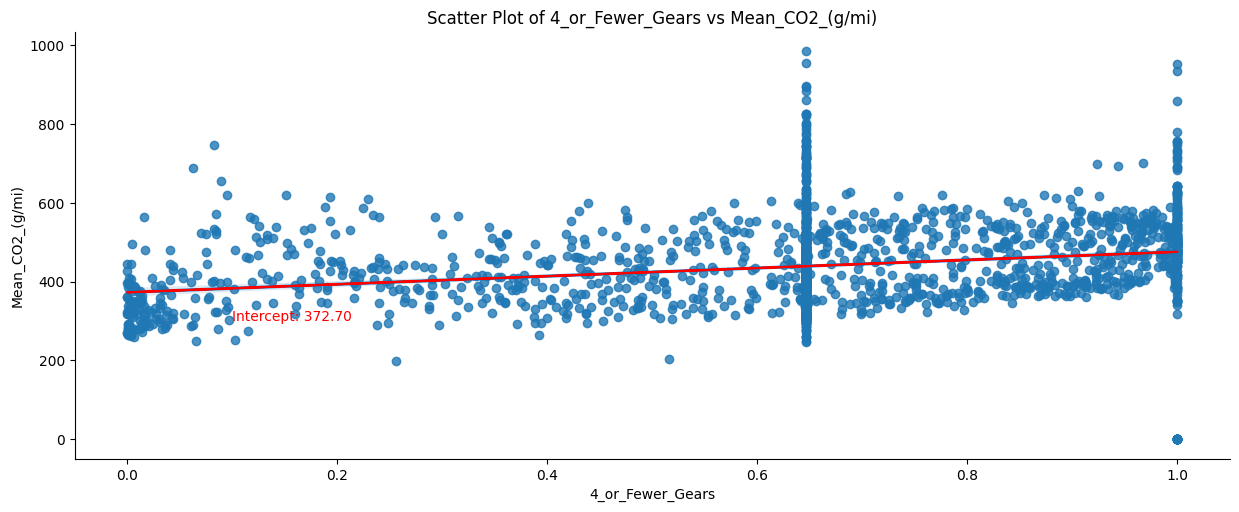

In [29]:
plt.figure(figsize=(15, 10))
sns.lmplot(data=bard_data, x='4_or_Fewer_Gears', y='Mean_CO2_(g/mi)', height=5, aspect=2.5)
plt.title('Scatter Plot of 4_or_Fewer_Gears vs Mean_CO2_(g/mi)')
plt.xlabel('4_or_Fewer_Gears')
plt.ylabel('Mean_CO2_(g/mi)')
slope, intercept = np.polyfit(bard_data['4_or_Fewer_Gears'], bard_data['Mean_CO2_(g/mi)'], 1)
plt.plot(bard_data['4_or_Fewer_Gears'], slope * bard_data['4_or_Fewer_Gears'] + intercept, color='red')
plt.annotate(f'Intercept: {intercept:.2f}', xy=(0.1, 300), color='red')
plt.show()

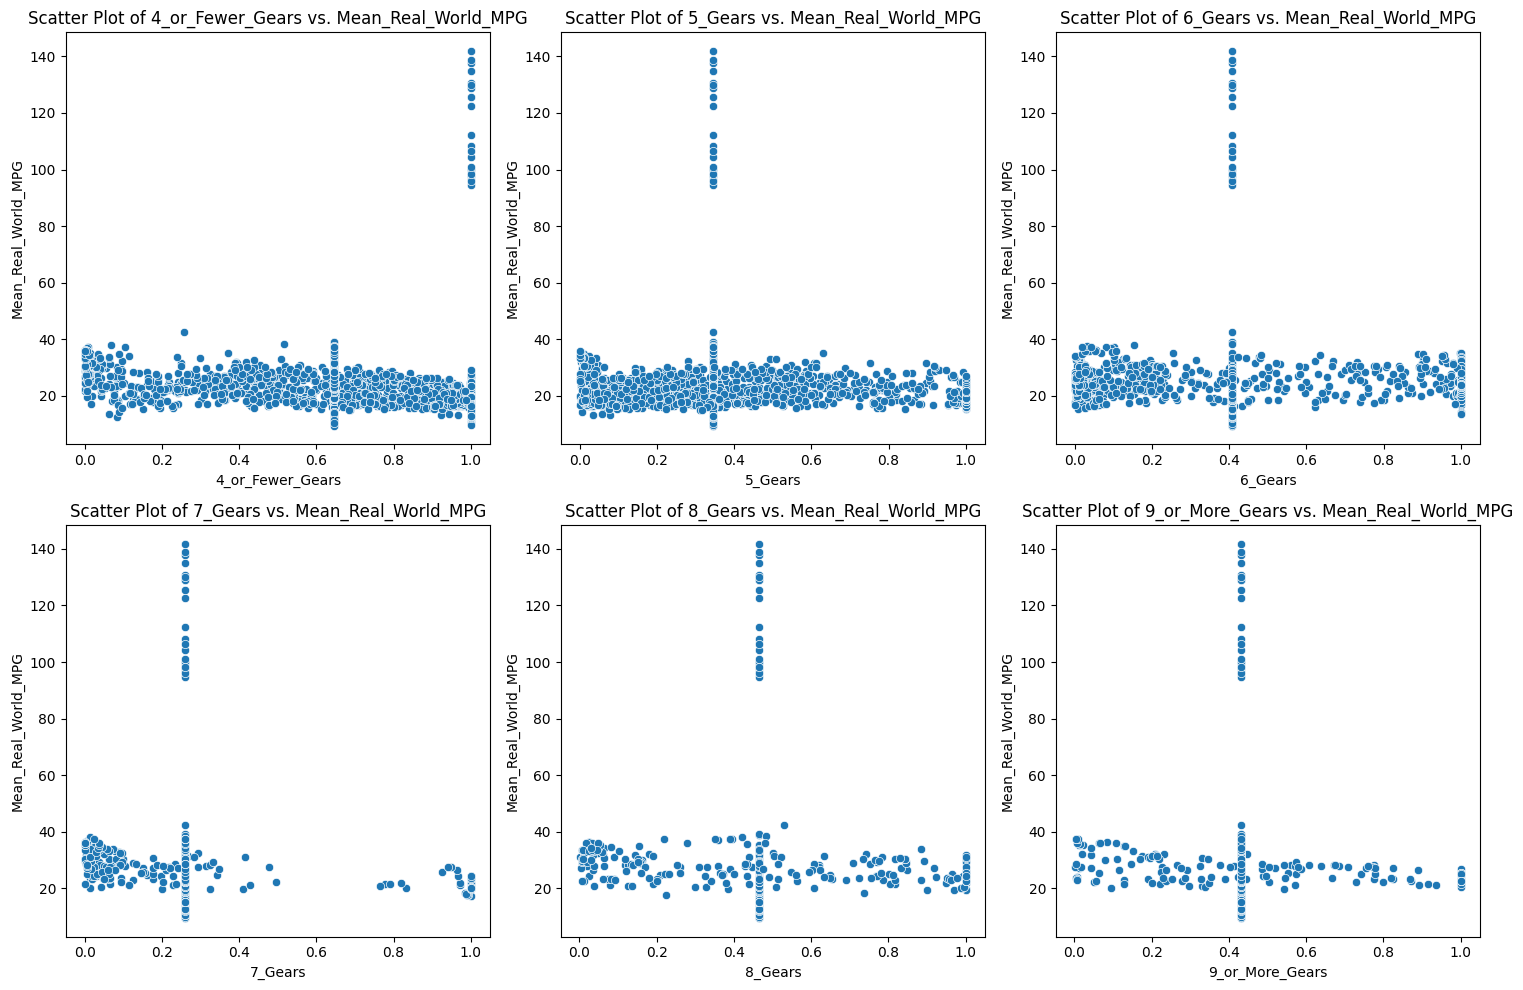

In [30]:
gears_columns = ['4_or_Fewer_Gears','5_Gears', '6_Gears', '7_Gears', '8_Gears', '9_or_More_Gears']
target_column = 'Mean_Real_World_MPG'

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, gear_column in enumerate(gears_columns):  
    sns.scatterplot(data=bard_data, x=gear_column, y=target_column, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Scatter Plot of {gear_column} vs. {target_column}')
    axes[i//3, i%3].set_xlabel(gear_column)
    axes[i//3, i%3].set_ylabel(target_column)

plt.tight_layout()
plt.show()

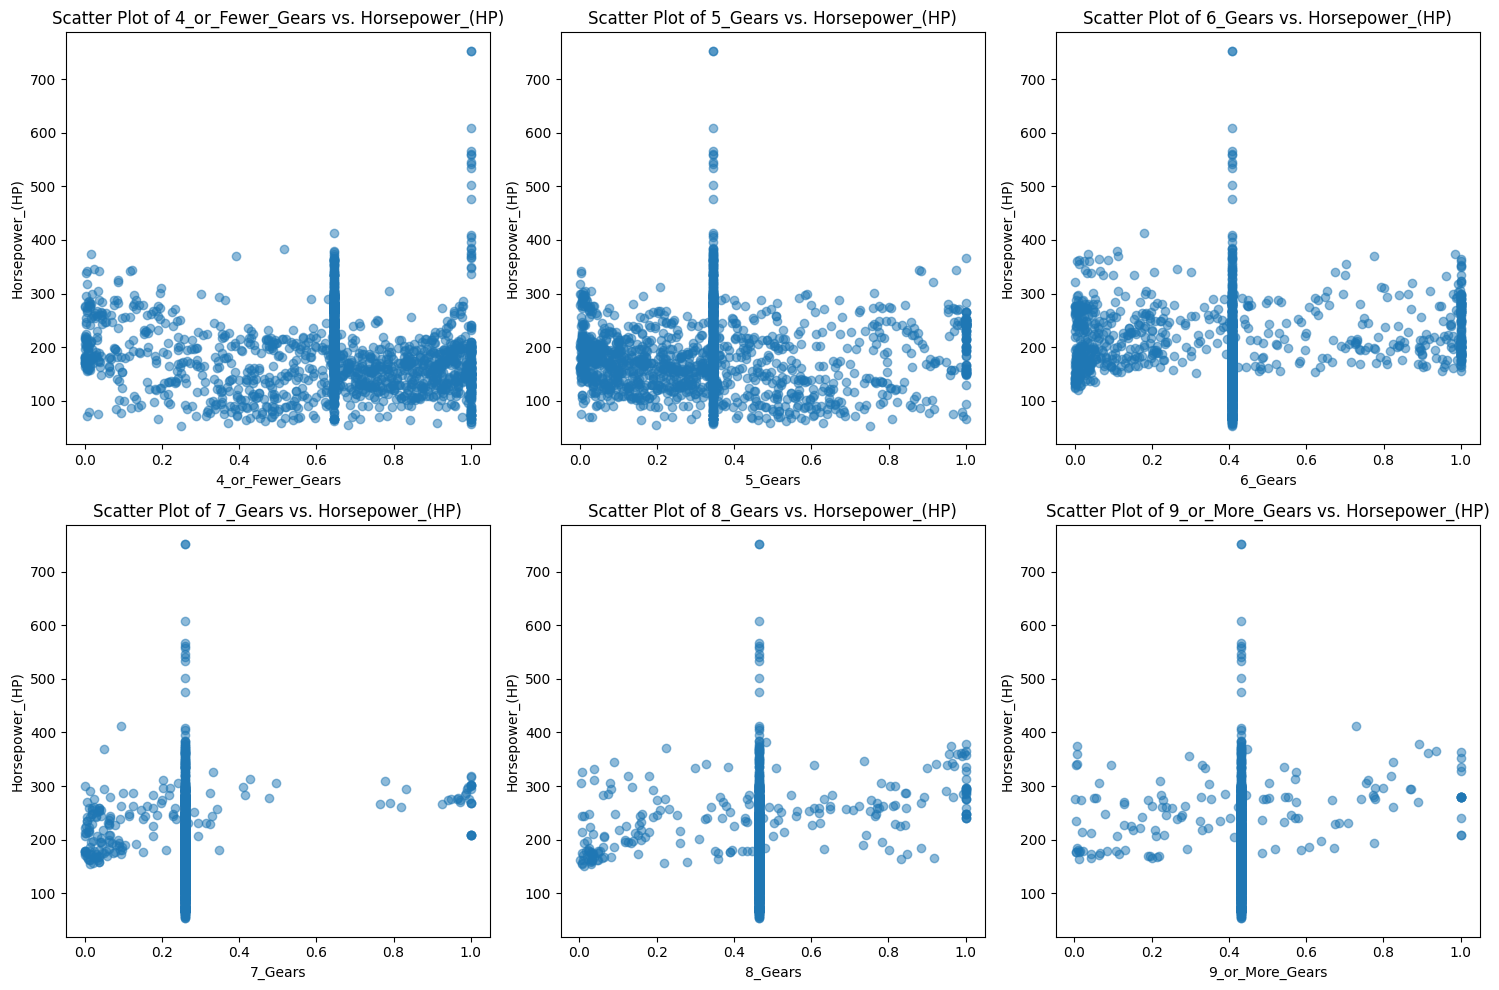

In [31]:
gears_columns = ['4_or_Fewer_Gears','5_Gears', '6_Gears', '7_Gears', '8_Gears', '9_or_More_Gears']
target_column = 'Horsepower_(HP)'

plt.figure(figsize=(15, 10))
for i, gear in enumerate(gears_columns, 1):
    plt.subplot(2, 3, i)
    plt.scatter(bard_data[gear], bard_data[target_column], alpha=0.5)
    plt.title(f'Scatter Plot of {gear} vs. {target_column}')
    plt.xlabel(gear)
    plt.ylabel(target_column)

plt.tight_layout()
plt.show()

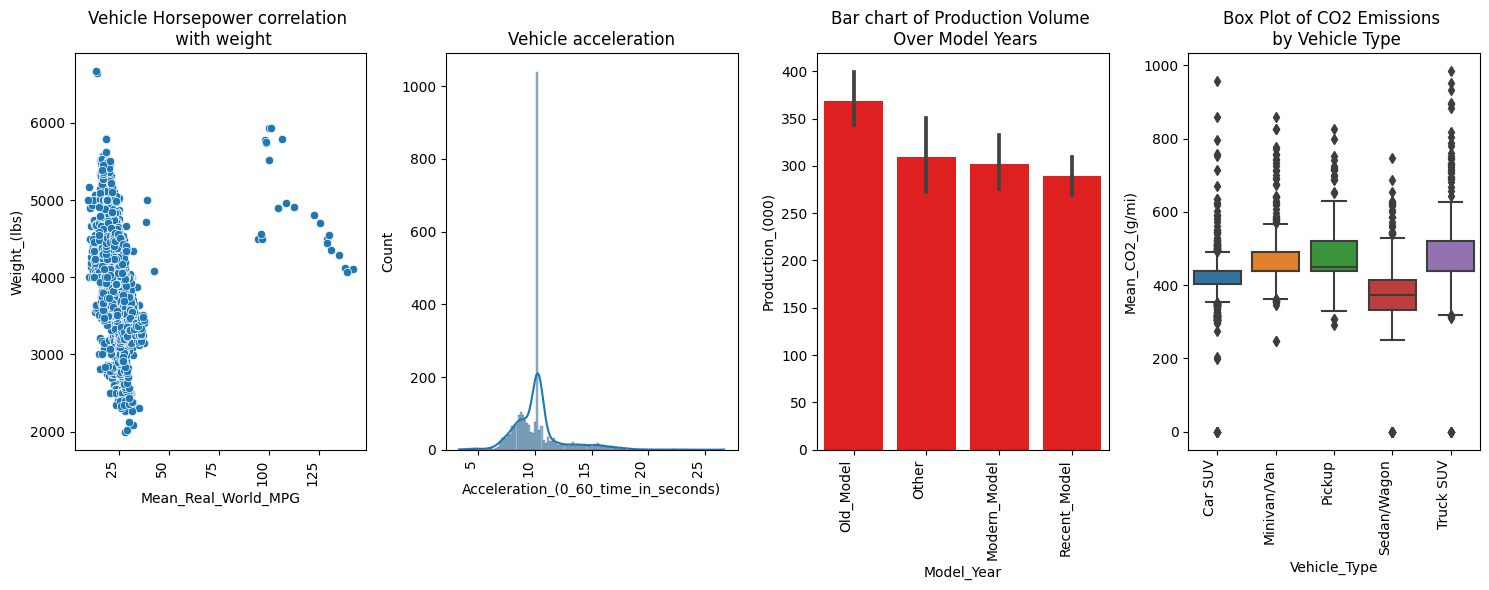

In [32]:
fig, ax = plt.subplots(1,4, figsize=(15,6))

sns.scatterplot(x="Mean_Real_World_MPG", y='Weight_(lbs)', data=bard_data, ax=ax[0]).set_title('Vehicle Horsepower correlation \n with weight')
sns.histplot(x="Acceleration_(0_60_time_in_seconds)", kde=True, data=bard_data, ax=ax[1]).set_title('Vehicle acceleration')
sns.barplot(x='Model_Year', y='Production_(000)', data=bard_data, color='Red',ax=ax[2]).set_title('Bar chart of Production Volume \n Over Model Years')
sns.boxplot(x="Vehicle_Type", y="Mean_CO2_(g/mi)", data=bard_data, ax=ax[3]).set_title('Box Plot of CO2 Emissions \n by Vehicle Type')

for axes in ax:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90, ha='right')
    axes.set_title(axes.get_title(), fontsize=12)
            
plt.tight_layout()
plt.show()

In [33]:
bard_data.columns

Index(['Manufacturer', 'Model_Year', 'Regulatory_Class', 'Vehicle_Type',
       'Production_(000)', 'Production_Share', '2_Cycle_MPG', 'Real_World_MPG',
       'Real_World_MPG_City', 'Real_World_MPG_Hwy', 'Real_World_CO2_(g/mi)',
       'Real_World_CO2_City_(g/mi)', 'Real_World_CO2_Hwy_(g/mi)',
       'Weight_(lbs)', 'Footprint_(sq._ft.)', 'Engine_Displacement',
       'Horsepower_(HP)', 'Acceleration_(0_60_time_in_seconds)',
       'HP/Engine_Displacement', 'HP/Weight_(lbs)', 'Ton_MPG_(Real_World)',
       'Drivetrain_Front', 'Drivetrain_4WD', 'Drivetrain_Rear',
       'Transmission_Manual', 'Transmission_Automatic', 'Transmission_Lockup',
       'Transmission_CVT_(Hybrid)', 'Transmission_Other',
       'Fuel_Delivery_Carbureted',
       'Fuel_Delivery_Gasoline_Direct_Injection_(GDI)',
       'Fuel_Delivery_Port_Fuel_Injection',
       'Fuel_Delivery_Throttle_Body_Injection', 'Fuel_Delivery_Other',
       'Powertrain_Diesel', 'Powertrain_Electric_Vehicle_(EV)',
       'Powertrain_Plug

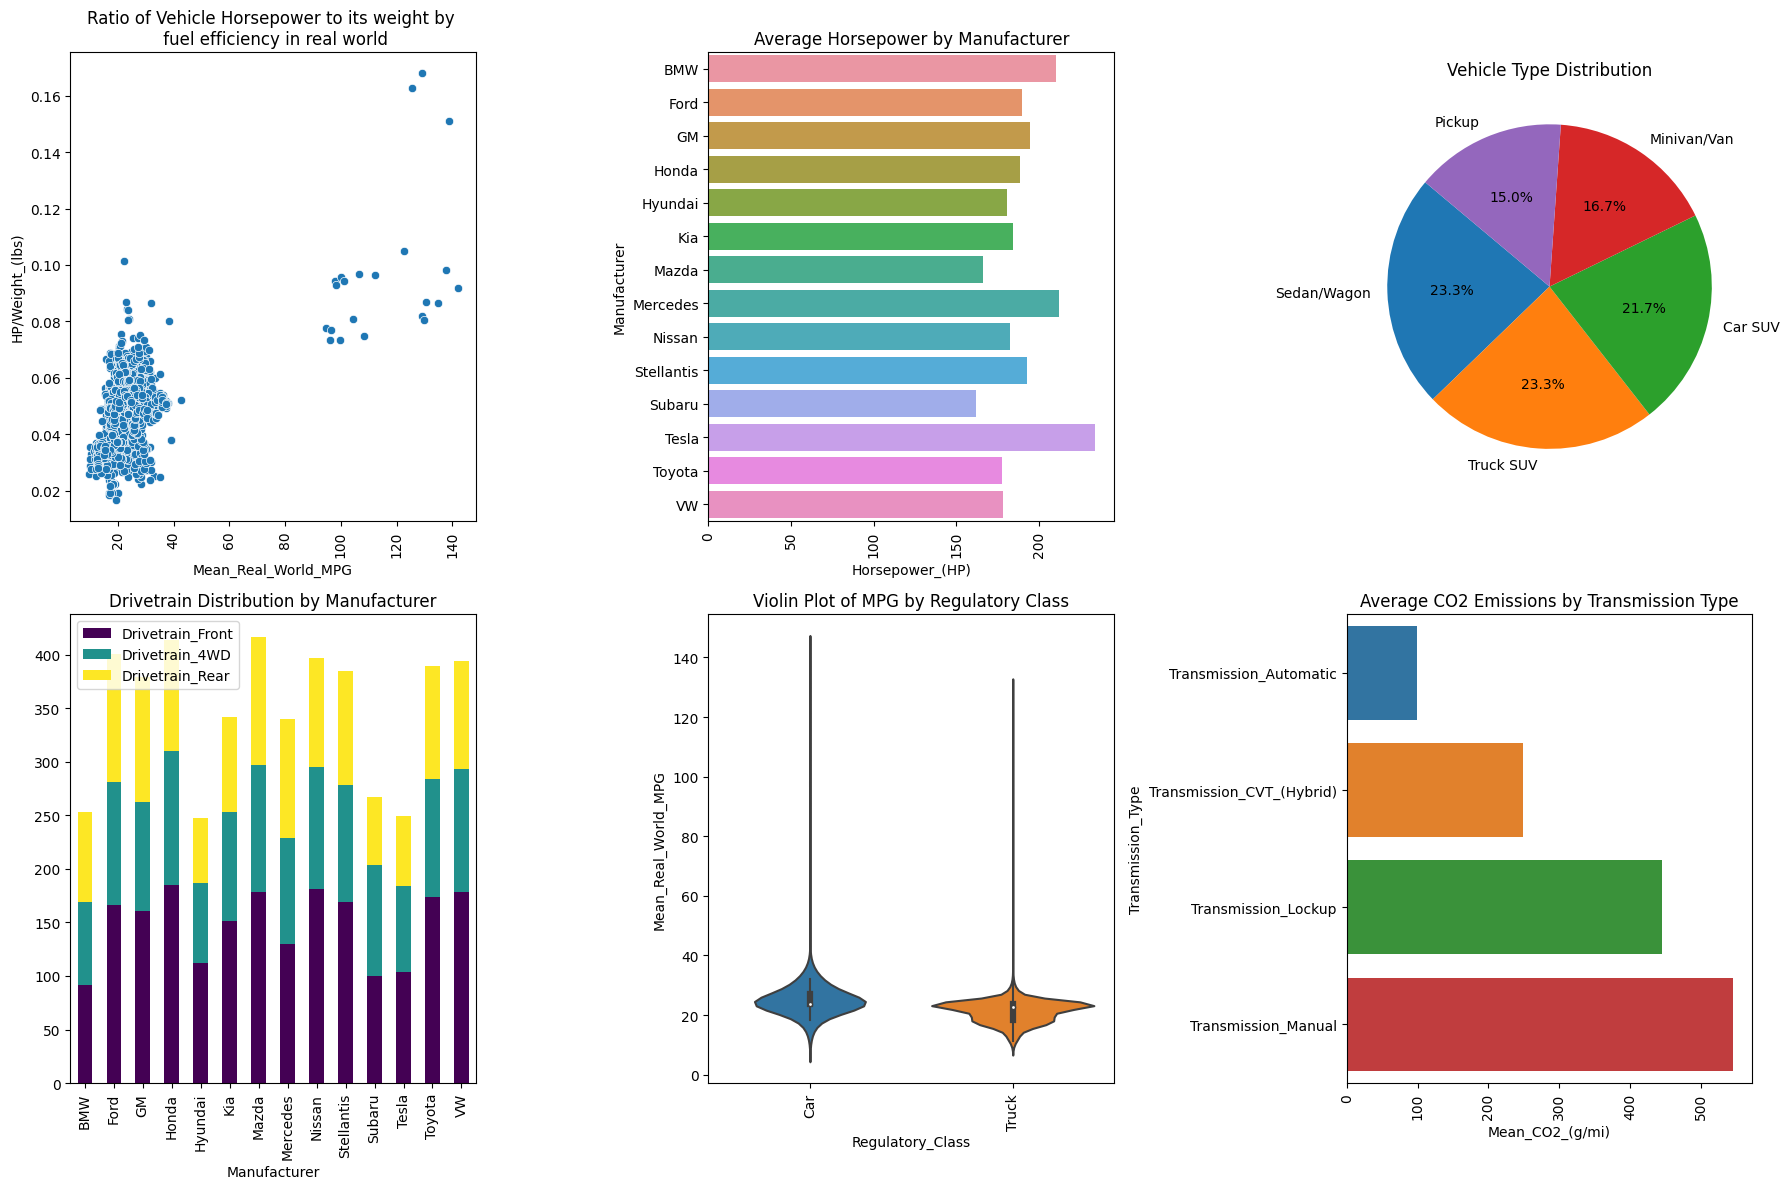

In [34]:

#subplots
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Scatter plot of HP/Weight vs. Real-World MPG
sns.scatterplot(x="Mean_Real_World_MPG", y='HP/Weight_(lbs)', data=bard_data, ax=ax[0, 0]).set_title("Ratio of Vehicle Horsepower to its weight by \n fuel efficiency in real world")

# Bar plot of Average Horsepower by Manufacturer
average_hp_by_manufacturer = bard_data.groupby('Manufacturer')['Horsepower_(HP)'].mean().reset_index()
sns.barplot(x='Horsepower_(HP)', y='Manufacturer', data=average_hp_by_manufacturer, ax=ax[0, 1]).set_title('Average Horsepower by Manufacturer')

# Pie chart of Vehicle Type Distribution
vehicle_type_distribution = bard_data['Vehicle_Type'].value_counts()
ax[0, 2].pie(vehicle_type_distribution, labels=vehicle_type_distribution.index, autopct='%1.1f%%', startangle=140)
ax[0, 2].set_title('Vehicle Type Distribution')

# Stacked bar chart of Drivetrain Distribution by Manufacturer
drivetrain_columns = ['Drivetrain_Front', 'Drivetrain_4WD', 'Drivetrain_Rear']
drivetrain_distribution = bard_data.groupby('Manufacturer')[drivetrain_columns].sum()
drivetrain_distribution.plot(kind='bar', stacked=True, ax=ax[1, 0], colormap='viridis')
ax[1, 0].set_title('Drivetrain Distribution by Manufacturer')

# Violin plot of MPG by Regulatory Class
sns.violinplot(x="Regulatory_Class", y="Mean_Real_World_MPG", data=bard_data, ax=ax[1, 1]).set_title('Violin Plot of MPG by Regulatory Class')

# Bar plot of Average CO2 Emissions by Transmission Type
# First, we melt the dataset to have a single column for transmission type
transmission_columns = ['Transmission_Manual', 'Transmission_Automatic', 'Transmission_Lockup', 'Transmission_CVT_(Hybrid)', 'Transmission_Other']
bard_data_melted = bard_data.melt(id_vars=['Mean_CO2_(g/mi)'], value_vars=transmission_columns, var_name='Transmission_Type', value_name='Presence')
# Filter out rows where the transmission type is not present (assuming 0 means not present)
bard_data_melted = bard_data_melted[bard_data_melted['Presence'] == 1]
# Group by transmission type and calculate the mean CO2 emissions
average_co2_by_transmission = bard_data_melted.groupby('Transmission_Type')['Mean_CO2_(g/mi)'].mean().reset_index()
sns.barplot(x='Mean_CO2_(g/mi)', y='Transmission_Type', data=average_co2_by_transmission, ax=ax[1, 2]).set_title('Average CO2 Emissions by Transmission Type')

# Rotate x-axis labels for all plots
for axes in ax.flat:
    if axes.get_xticklabels():
        for label in axes.get_xticklabels():
            label.set_rotation(90)
            
plt.tight_layout()
plt.show()

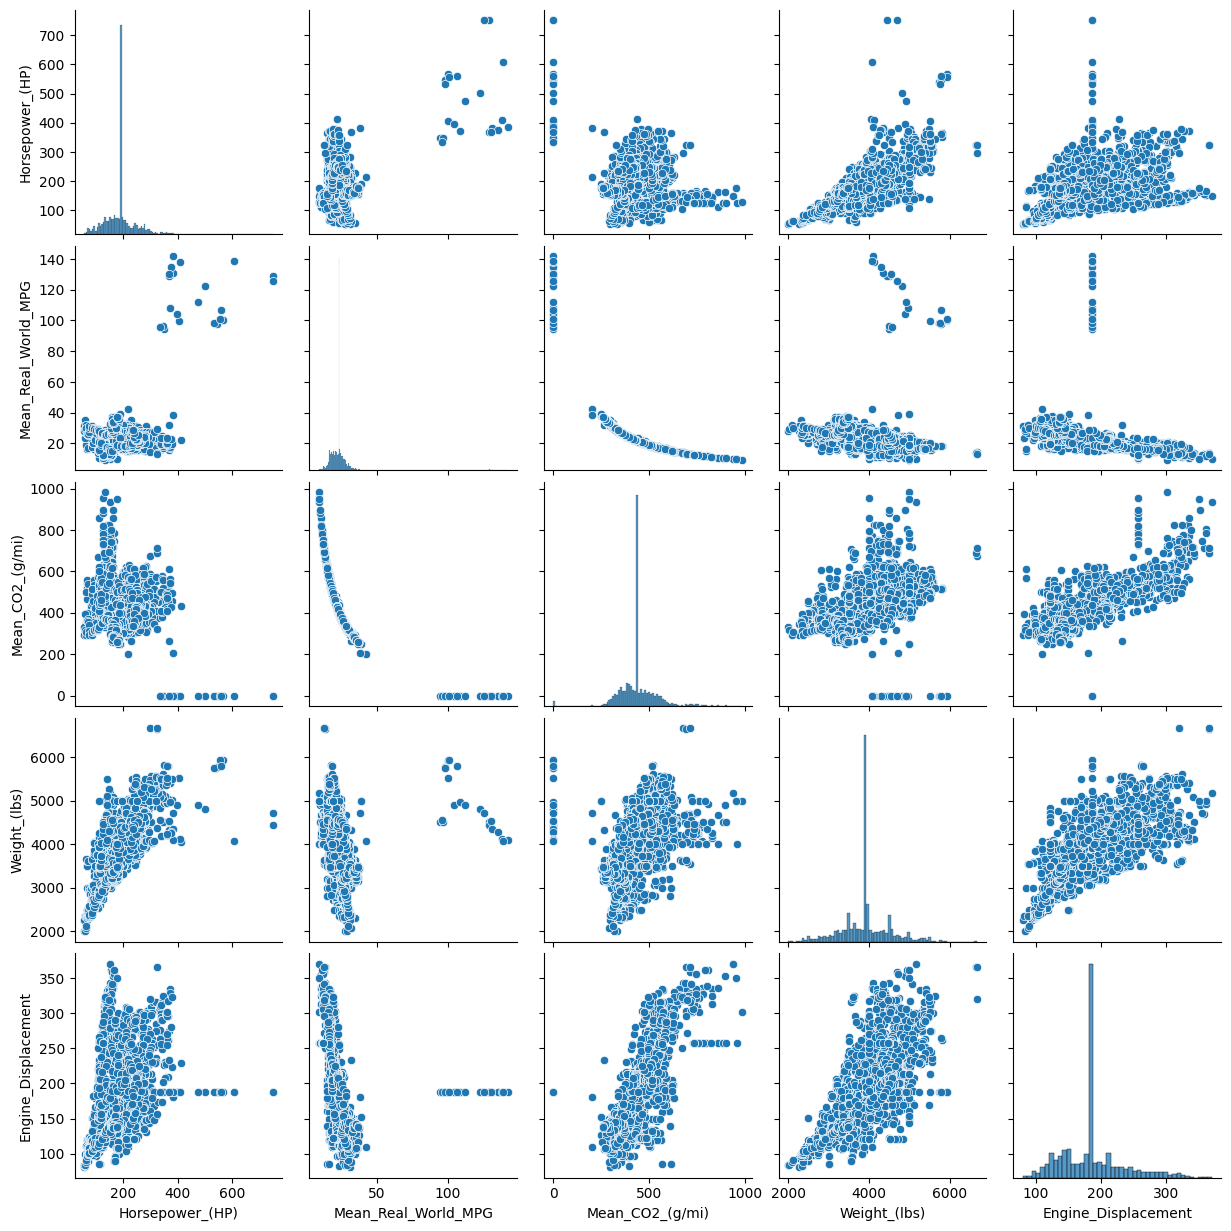

In [35]:
#Scatter Plot Matrix (Pair Plot)
sns.pairplot(bard_data[['Horsepower_(HP)','Mean_Real_World_MPG','Mean_CO2_(g/mi)','Weight_(lbs)','Engine_Displacement']], )
plt.show()

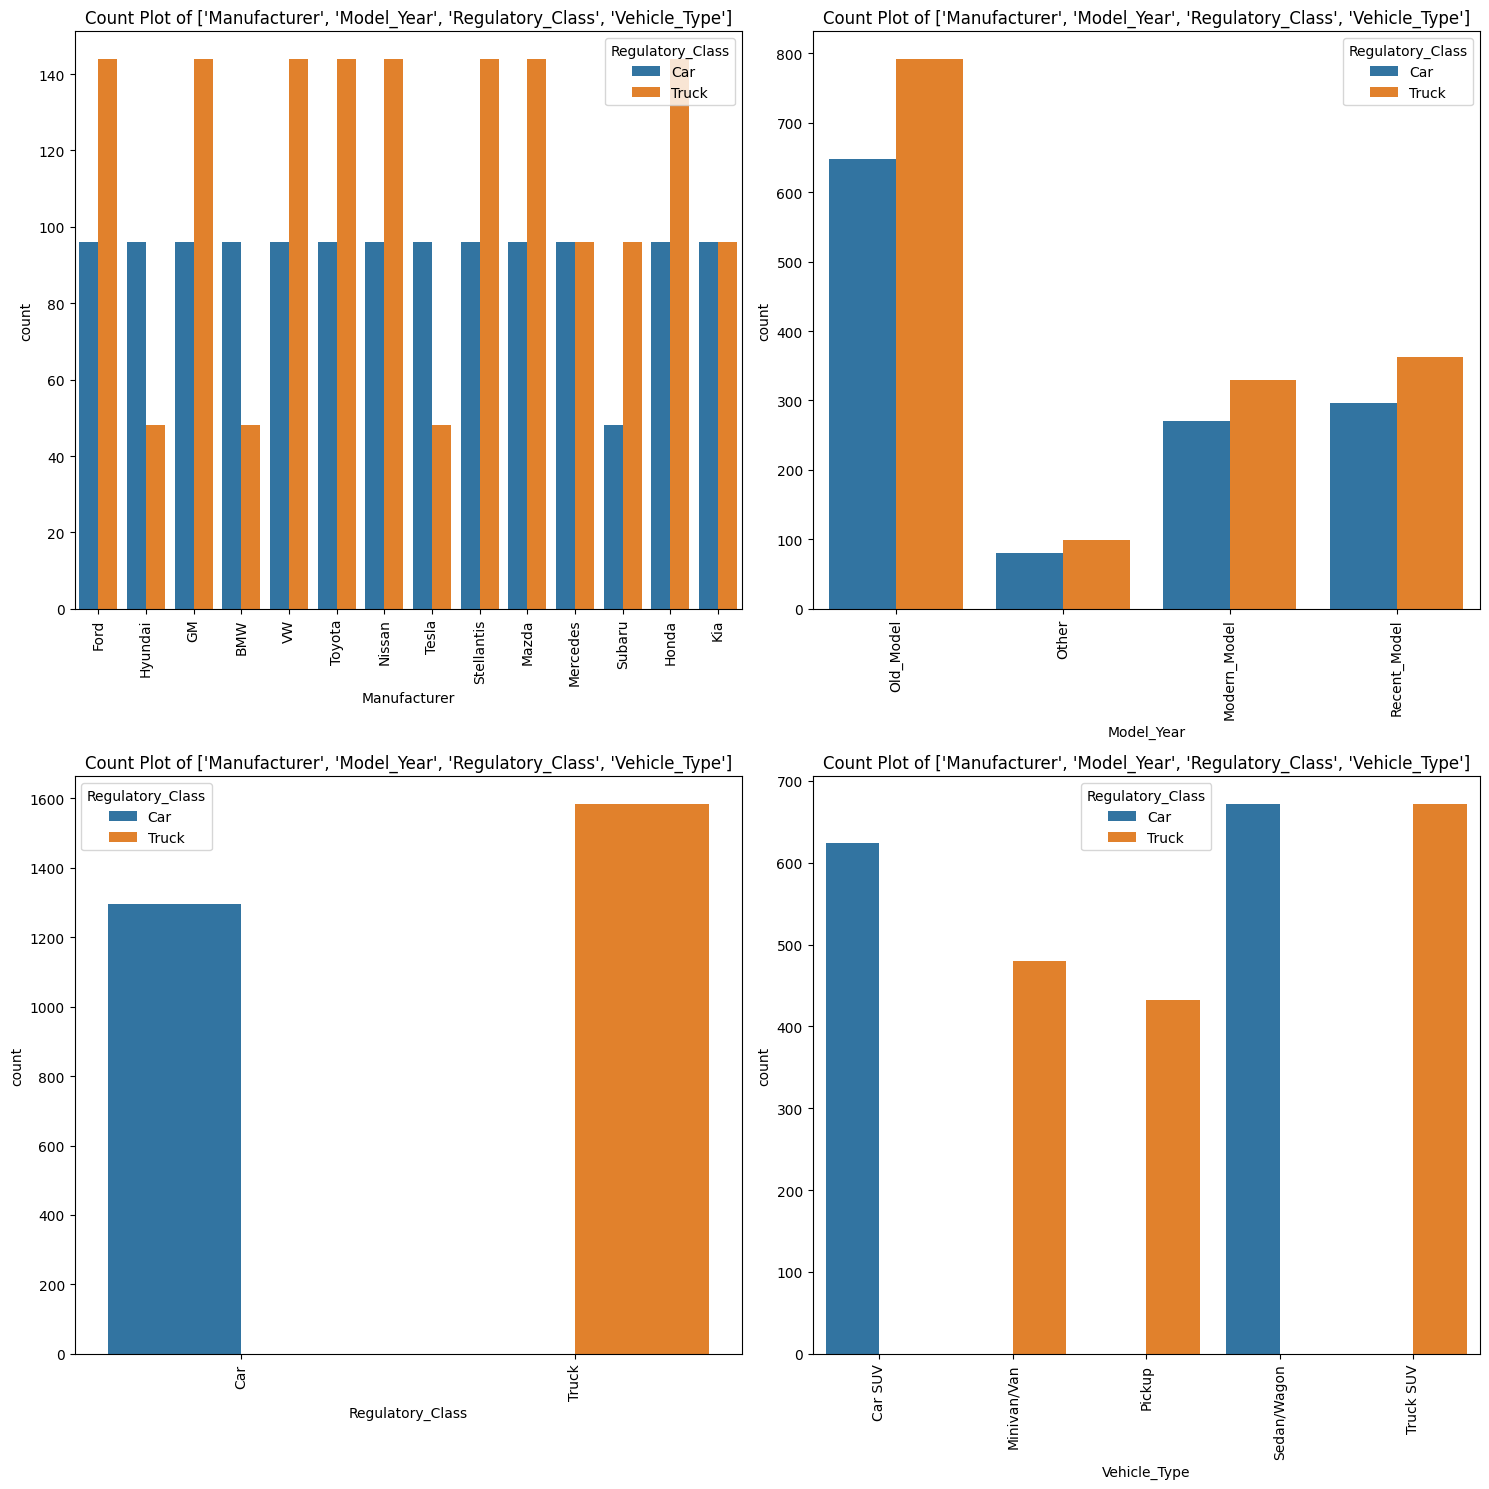

In [36]:
bard_var = ['Manufacturer','Model_Year','Regulatory_Class','Vehicle_Type']

fig, axs = plt.subplots(nrows=2 , ncols=2, figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate(bard_var[:4]):
    sns.countplot(x=var, hue='Regulatory_Class',data=bard_data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_title(f'Count Plot of {bard_var}')

fig.tight_layout()

plt.show()

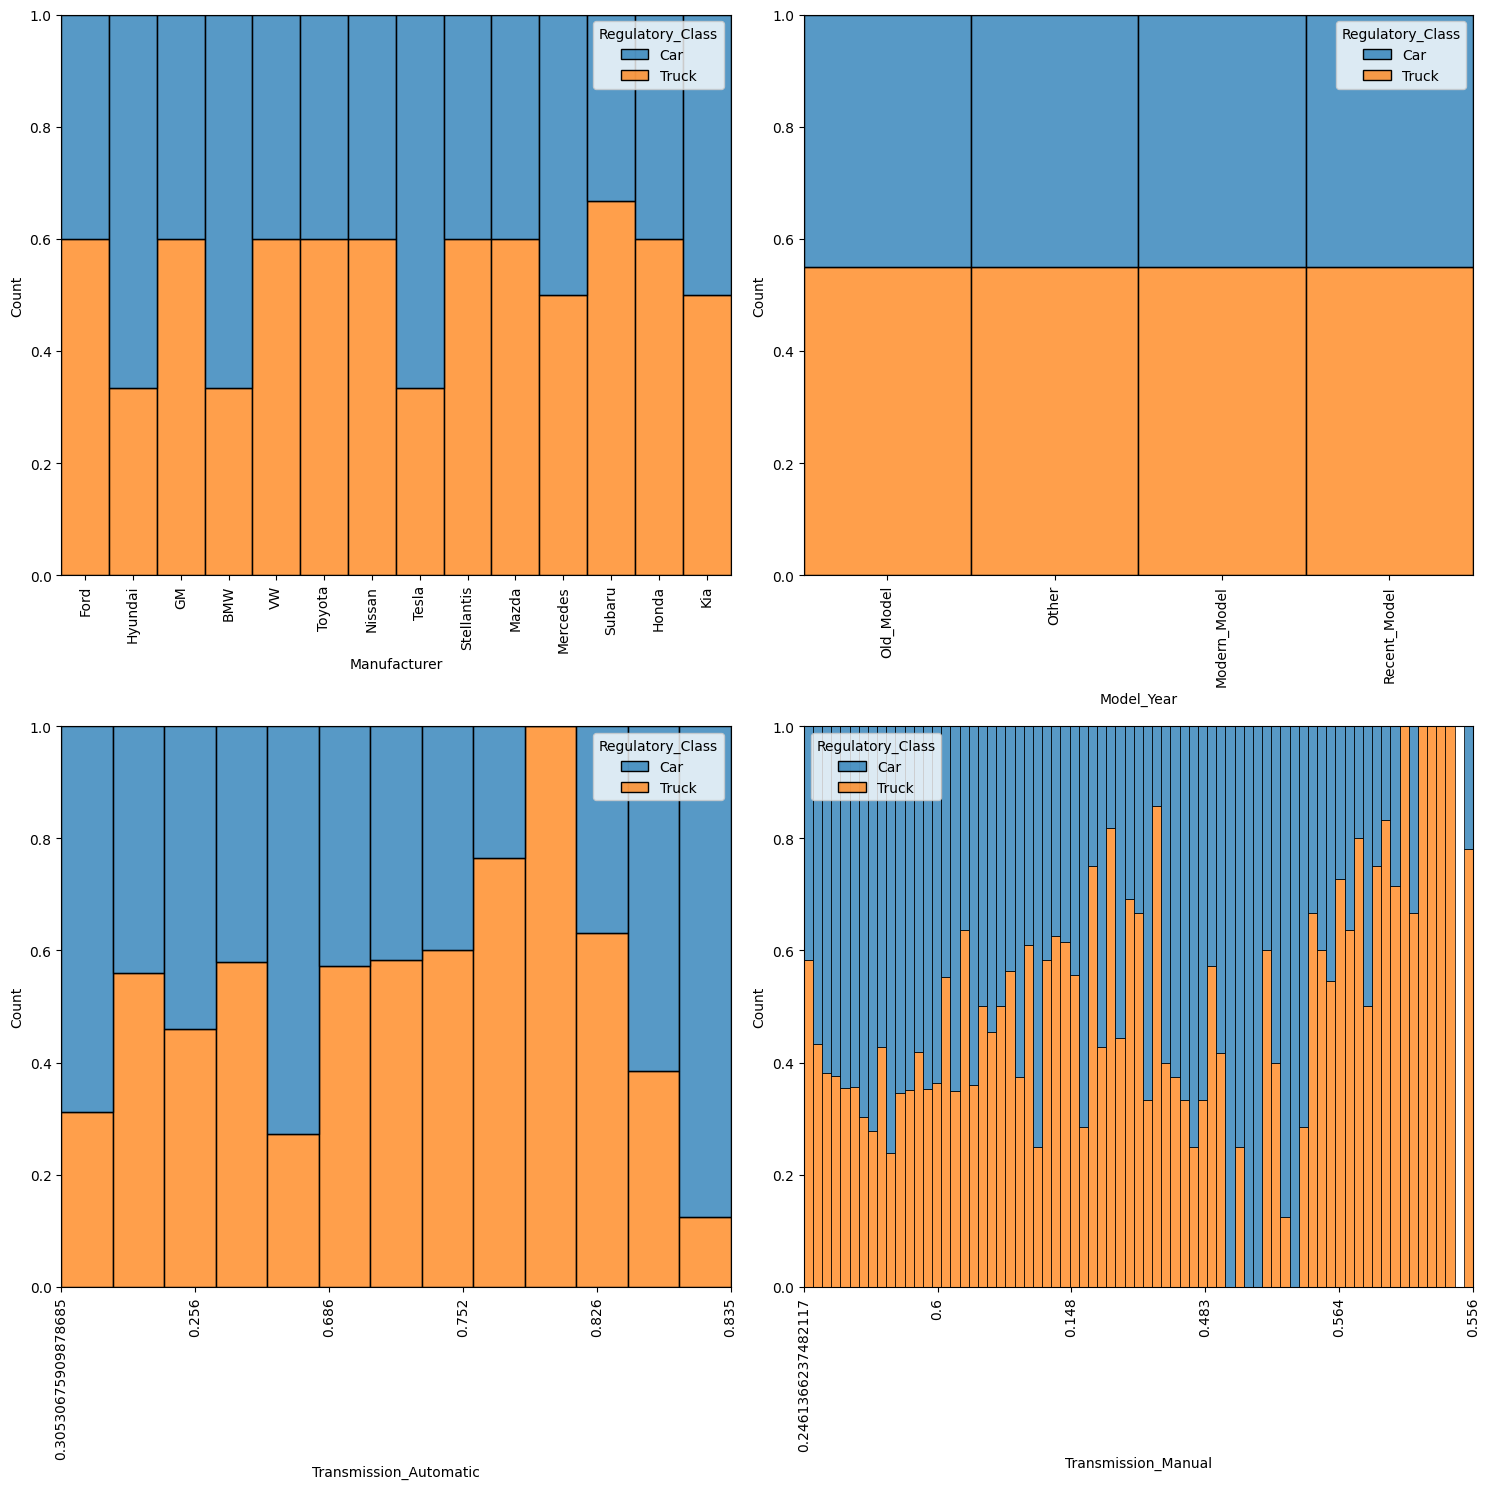

In [37]:
bard_var = ['Manufacturer','Model_Year','Transmission_Automatic','Transmission_Manual',]

fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate(bard_var[:4]):
    sns.histplot(x=var, hue='Regulatory_Class', data=bard_data, ax=axs[i], multiple='fill', kde=False, element='bars')
    axs[i].set_xticklabels(bard_data[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
    
fig.tight_layout()
plt.show()


- Descriptive data analysis

In [38]:
bard_data.describe()

,Production_(000),Production_Share,2_Cycle_MPG,Real_World_MPG,Real_World_MPG_City,Real_World_MPG_Hwy,Real_World_CO2_(g/mi),Real_World_CO2_City_(g/mi),Real_World_CO2_Hwy_(g/mi),Weight_(lbs),Footprint_(sq._ft.),Engine_Displacement,Horsepower_(HP),Acceleration_(0_60_time_in_seconds),HP/Engine_Displacement,HP/Weight_(lbs),Ton_MPG_(Real_World),Drivetrain_Front,Drivetrain_4WD,Drivetrain_Rear,Transmission_Manual,Transmission_Automatic,Transmission_Lockup,Transmission_CVT_(Hybrid),Transmission_Other,Fuel_Delivery_Carbureted,Fuel_Delivery_Gasoline_Direct_Injection_(GDI),Fuel_Delivery_Port_Fuel_Injection,Fuel_Delivery_Throttle_Body_Injection,Fuel_Delivery_Other,Powertrain_Diesel,Powertrain_Electric_Vehicle_(EV),Powertrain_Plug_in_Hybrid_Electric_Vehicle_(PHEV),Powertrain_Fuel_Cell_Vehicle_(FCV),Powertrain_Other_(incl._CNG),Powertrain_Gasoline_Hybrid,Powertrain_Gasoline,Turbocharged_Engine,Stop/Start,Cylinder_Deactivation,Multivalve_Engine,Variable_Valve_Timing,Average_Number_of_Gears,Transmission_CVT_(Non_Hybrid),4_or_Fewer_Gears,5_Gears,6_Gears,7_Gears,8_Gears,9_or_More_Gears,Mean_CO2_(g/mi),Mean_Real_World_MPG
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,333.096941,0.024358,27.572156,22.139607,19.554939,25.063002,436.367455,496.926752,383.945484,3916.301228,50.270228,187.450322,188.530664,10.257176,1.038059,0.047028,43.352957,0.723129,0.501504,0.468060,0.246137,0.305307,0.787847,0.067078,0.052545,0.757492,0.652325,0.819349,0.441275,0.124859,0.081122,0.210605,0.022100,0.001000,0.002091,0.066996,0.978442,0.322869,0.487880,0.341457,0.857151,0.869384,4.881011,0.422309,0.645919,0.343784,0.406081,0.258371,0.464276,0.430985,439.079897,23.582426
std,439.686868,0.033580,11.642123,8.471076,8.702787,8.390701,93.963133,101.603021,86.785265,588.151441,3.095638,47.956228,59.298785,2.267828,0.281018,0.010272,20.479437,0.198127,0.237580,0.252758,0.189156,0.144919,0.207971,0.029020,0.002827,0.126413,0.146571,0.232940,0.087636,0.092701,0.042834,0.079336,0.005114,0.000115,0.000113,0.035576,0.060792,0.146672,0.106804,0.092352,0.195735,0.149936,1.179428,0.109406,0.222116,0.204644,0.207271,0.087080,0.099387,0.071340,93.397299,9.267519
min,0.000000,0.000000,10.587320,8.994720,8.001960,9.588200,0.000000,0.000000,0.000000,2000.000000,42.561640,80.397200,54.119500,3.295600,0.399278,0.016770,18.396130,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.002000,0.000000,0.005000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.204000,0.000000,0.000000,0.000000,0.000000,0.001000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000,0.002000,0.000000,9.441418
25%,97.750000,0.007000,23.573708,19.160810,16.624727,21.935673,390.987242,452.571905,338.523892,3629.440500,50.270228,153.461325,159.007150,8.943250,0.902333,0.042594,37.133525,0.723129,0.501504,0.468060,0.148000,0.305307,0.787847,0.067078,0.052545,0.757492,0.652325,0.819349,0.441275,0.124859,0.081122,0.210605,0.022100,0.001000,0.002091,0.066996,0.978442,0.322869,0.487880,0.341457,0.857151,0.869384,4.200000,0.422309,0.645919,0.316750,0.406081,0.258371,0.464276,0.430985,394.568313,20.363327
50%,333.096941,0.024358,27.572156,22.139607,19.554939,25.063002,436.367455,496.926752,383.945484,3916.301228,50.270228,187.450322,188.530664,10.257176,1.038059,0.047028,43.352957,0.723129,0.501504,0.468060,0.246137,0.305307,0.787847,0.067078,0.052545,0.757492,0.652325,0.819349,0.441275,0.124

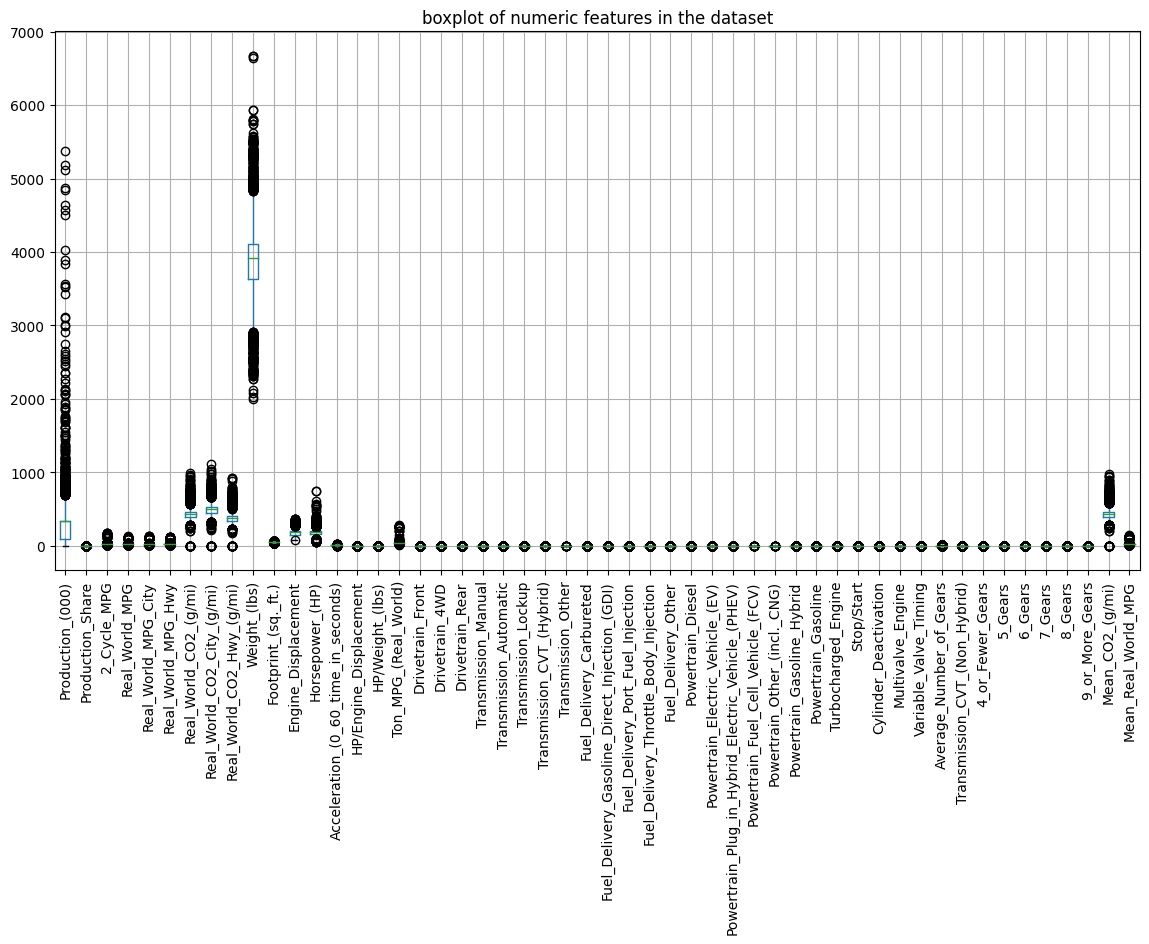

In [39]:
# Create the boxplot
bard_data.boxplot(figsize=(14,7))
plt.title('boxplot of numeric features in the dataset')
plt.xticks(rotation=90)
plt.show()

In [40]:
bard_data.head()

,Manufacturer,Model_Year,Regulatory_Class,Vehicle_Type,Production_(000),Production_Share,2_Cycle_MPG,Real_World_MPG,Real_World_MPG_City,Real_World_MPG_Hwy,Real_World_CO2_(g/mi),Real_World_CO2_City_(g/mi),Real_World_CO2_Hwy_(g/mi),Weight_(lbs),Footprint_(sq._ft.),Engine_Displacement,Horsepower_(HP),Acceleration_(0_60_time_in_seconds),HP/Engine_Displacement,HP/Weight_(lbs),Ton_MPG_(Real_World),Drivetrain_Front,Drivetrain_4WD,Drivetrain_Rear,Transmission_Manual,Transmission_Automatic,Transmission_Lockup,Transmission_CVT_(Hybrid),Transmission_Other,Fuel_Delivery_Carbureted,Fuel_Delivery_Gasoline_Direct_Injection_(GDI),Fuel_Delivery_Port_Fuel_Injection,Fuel_Delivery_Throttle_Body_Injection,Fuel_Delivery_Other,Powertrain_Diesel,Powertrain_Electric_Vehicle_(EV),Powertrain_Plug_in_Hybrid_Electric_Vehicle_(PHEV),Powertrain_Fuel_Cell_Vehicle_(FCV),Powertrain_Other_(incl._CNG),Powertrain_Gasoline_Hybrid,Powertrain_Gasoline,Turbocharged_Engine,Stop/Start,Cylinder_Deactivation,Multivalve_Engine,Variable_Valve_Timing,Average_Number_of_Gears,Transmission_CVT_(Non_Hybrid),4_or_Fewer_Gears,5_Gears,6_Gears,7_Gears,8_Gears,9_or_More_Gears,Mean_CO2_(g/mi),Mean_Real_World_MPG
0,Ford,Old_Model,Car,Car SUV,333.096941,0.024358,27.572156,22.139607,19.554939,25.063002,436.367455,496.926752,383.945484,3916.301228,50.270228,187.450322,188.530664,10.257176,1.038059,0.047028,43.352957,0.723129,0.501504,0.46806,0.246137,0.305307,0.787847,0.067078,0.052545,0.757492,0.652325,0.819349,0.441275,0.124859,0.081122,0.210605,0.0221,0.001,0.002091,0.066996,0.978442,0.322869,0.48788,0.341457,0.857151,0.869384,4.881011,0.422309,0.645919,0.343784,0.406081,0.258371,0.464276,0.430985,439.079897,23.582426
1,Ford,Old_Model,Car,Car SUV,333.096941,0.024358,27.572156,22.139607,19.554939,25.063002,436.367455,496.926752,383.945484,3916.301228,50.270228,187.450322,188.530664,10.257176,1.038059,0.047028,43.352957,0.723129,0.501504,0.46806,0.246137,0.305307,0.787847,0.067078,0.052545,0.757492,0.652325,0.819349,0.441275,0.124859,0.081122,0.210605,0.0221,0.001,0.002091,0.066996,0.978442,0.322869,0.48788,0.341457,0.857151,0.869384,4.881011,0.422309,0.645919,0.343784,0.406081,0.258371,0.464276,0.430985,439.079897,23.582426
2,Ford,Old_Model,Car,Car SUV,333.096941,0.024358,27.572156,22.139607,19.554939,25.063002,436.367455,496.926752,383.945484,3916.301228,50.270228,187.450322,188.530664,10.257176,1.038059,0.047028,43.352957,0.723129,0.501504,0.46806,0.246137,0.305307,0.787847,0.067078,0.052545,0.757492,0.652325,0.819349,0.441275,0.124859,0.081122,0.210605,0.0221,0.001,0.002091,0.066996,0.978442,0.322869,0.48788,0.341457,0.857151,0.869384,4.881011,0.422309,0.645919,0.343784,0.406081,0.258371,0.464276,0.430985,439.079897,23.582426
3,Ford,Old_Model,Car,Car SUV,333.096941,0.024358,27.572156,22.139607,19.554939,25.063002,436.367455,496.926752,383.945484,3916.301228,50.270228,187.450322,188.530664,10.257176,1.038059,0.047028,43.352957,0.723129,0.501504,0.46806,0.246137,0.305307,0.787847,0.067078,0.052545,0.757492,0.652325,0.819349,0.441275,0.124859,0.081122,0.210605,0.0221,0.001,0.002091,0.066996,0.978442,0.322869,0.48788,0.341457,0.857151,0.869384,4.881011,0.422309,0.645919,0.343784,0.406081,0.258371,0.464276,0.430985,439.079897,23.582426
4,Ford,Old_Model,Car,Car SUV,333.096941,0.024358,27.572156,22.139607,19.554939,25.063002,436.367455,496.926752,383.945484,3916.301228,50.270228,187.450322,188.530664,10.257176,1.038059,0.047028,43.352957,0.723129,0.501504,0.46806,0.246137,0.305307,0.787847,0.067078,0.052545,0.757492,0.652325,0.819349,0.441275,0.124859,0.081122,0.210605,0.0221,0.001,0.002091,0.066996,0.978442,0.322869,0.48788,0.341457,0.857151,0.869384,4.881011,0.422309,0.645919,0.343784,0.406081,0.258371,0.464276,0.430985,439.079897,23.582426


**Create a Database for the cleaned Data**

In [41]:
#import modules
import sql
import sqlite3 as sqlite
import sqlalchemy_utils
import sqlalchemy
from sqlalchemy import create_engine
from sqlite3.dbapi2 import *

In [43]:
# Create an SQLAlchemy engine
db_path = r"C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/database/EmissionDatabase.db"

engine = create_engine(f'sqlite:///{db_path}')

In [44]:
# Connect to the SQLite database
con = sqlite.connect(db_path)
cur = con.cursor()

print(f'Connected successfully to {con}')

Connected successfully to <sqlite3.Connection object at 0x000001D55C89A6B0>


In [45]:
#Enable the SqL extension
%reload_ext sql

%sql sqlite:///EmissionDatabase.db
# %sql sqlite:///{db_path}

In [61]:
#incooperathe the dataset into the database

# %sql --persist bard_data #run this only once

In [ ]:
# to delete the table from the database
# %sql drop table bard_data;

In [ ]:
#Check for the database schema
%sql select name from sqlite_master where type='table';

   sqlite:///C:/Users/admin/Documents/Conda
 * sqlite:///EmissionDatabase.db
Done.


name
bard_data


In [ ]:
#check for the table info
%sql PRAGMA table_info(bard_data)

   sqlite:///C:/Users/admin/Documents/Conda
 * sqlite:///EmissionDatabase.db
Done.


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,Manufacturer,TEXT,0,None,0
2,Model_Year,TEXT,0,None,0
3,Regulatory_Class,TEXT,0,None,0
4,Vehicle_Type,TEXT,0,None,0
5,Production_(000),FLOAT,0,None,0
6,Production_Share,FLOAT,0,None,0
7,2_Cycle_MPG,FLOAT,0,None,0
8,Real_World_MPG,FLOAT,0,None,0
9,Real_World_MPG_City,FLOAT,0,None,0


In [ ]:
#verifying the database loaded correctly
%sql SELECT * FROM bard_data LIMIT 5;


   sqlite:///C:/Users/admin/Documents/Conda
 * sqlite:///EmissionDatabase.db
Done.


index,Manufacturer,Model_Year,Regulatory_Class,Vehicle_Type,Production_(000),Production_Share,2_Cycle_MPG,Real_World_MPG,Real_World_MPG_City,Real_World_MPG_Hwy,Real_World_CO2_(g/mi),Real_World_CO2_City_(g/mi),Real_World_CO2_Hwy_(g/mi),Weight_(lbs),Footprint_(sq._ft.),Engine_Displacement,Horsepower_(HP),Acceleration_(0_60_time_in_seconds),HP/Engine_Displacement,HP/Weight_(lbs),Ton_MPG_(Real_World),Drivetrain_Front,Drivetrain_4WD,Drivetrain_Rear,Transmission_Manual,Transmission_Automatic,Transmission_Lockup,Transmission_CVT_(Hybrid),Transmission_Other,Fuel_Delivery_Carbureted,Fuel_Delivery_Gasoline_Direct_Injection_(GDI),Fuel_Delivery_Port_Fuel_Injection,Fuel_Delivery_Throttle_Body_Injection,Fuel_Delivery_Other,Powertrain_Diesel,Powertrain_Electric_Vehicle_(EV),Powertrain_Plug_in_Hybrid_Electric_Vehicle_(PHEV),Powertrain_Fuel_Cell_Vehicle_(FCV),Powertrain_Other_(incl._CNG),Powertrain_Gasoline_Hybrid,Powertrain_Gasoline,Turbocharged_Engine,Stop/Start,Cylinder_Deactivation,Multivalve_Engine,Variable_Valve_Timing,Average_Number_of_Gears,Transmission_CVT_(Non_Hybrid),4_or_Fewer_Gears,5_Gears,6_Gears,7_Gears,8_Gears,9_or_More_Gears,Mean_CO2_(g/mi),Mean_Real_World_MPG
0,Ford,Old_Model,Car,Car SUV,333.0969414204251,0.024357698289269054,27.57215555779909,22.13960689550732,19.554939308430086,25.06300190307925,436.36745480565367,496.92675172640077,383.94548426047453,3916.3012276627965,50.27022827319588,187.4503218079673,188.53066436143365,10.25717569847127,1.0380590541368742,0.04702803382130237,43.3529565219586,0.7231293673276676,0.5015037720033528,0.4680599393019727,0.2461366237482117,0.30530675909878685,0.7878473282442747,0.06707792207792208,0.052545454545454555,0.7574920212765958,0.6523254817987151,0.8193492575855391,0.4412748538011696,0.12485866666666667,0.08112156862745099,0.21060483870967742,0.0221,0.001,0.0020909090909090908,0.06699625468164794,0.978441717791411,0.32286923076923074,0.4878803088803089,0.34145739910313905,0.8571510574018126,0.8693840503672613,4.881010638297872,0.42230859375000007,0.6459185867895545,0.34378393574297184,0.4060814419225634,0.2583707865168539,0.46427649769585255,0.43098518518518514,439.079896930843,23.58242591620394
1,Ford,Old_Model,Car,Car SUV,333.0969414204251,0.024357698289269054,27.57215555779909,22.13960689550732,19.554939308430086,25.06300190307925,436.36745480565367,496.92675172640077,383.94548426047453,3916.3012276627965,50.27022827319588,187.4503218079673,188.53066436143365,10.25717569847127,1.0380590541368742,0.04702803382130237,43.3529565219586,0.7231293673276676,0.5015037720033528,0.4680599393019727,0.2461366237482117,0.30530675909878685,0.7878473282442747,0.06707792207792208,0.052545454545454555,0.7574920212765958,0.6523254817987151,0.8193492575855391,0.4412748538011696,0.12485866666666667,0.08112156862745099,0.21060483870967742,0.0221,0.001,0.0020909090909090908,0.06699625468164794,0.978441717791411,0.32286923076923074,0.4878803088803089,0.34145739910313905,0.8571510574018126,0.8693840503672613,4.881010638297872,0.42230859375000007,0.6459185867895545,0.34378393574297184,0.4060814419225634,0.2583707865168539,0.46427649769585255,0.43098518518518514,439.079896930843,23.58242591620394
2,Ford,Old_Model,Car,Car SUV,333.0969414204251,0.024357698289269054,27.57215555779909,22.13960689550732,19.554939308430086,25.06300190307925,436.36745480565367,496.92675172640077,383.94548426047453,3916.3012276627965,50.27022827319588,187.4503218079673,188.53066436143365,10.25717569847127,1.0380590541368742,0.04702803382130237,43.3529565219586,0.7231293673276676,0.5015037720033528,0.4680599393019727,0.2461366237482117,0.30530675909878685,0.7878473282442747,0.06707792207792208,0.052545454545454555,0.7574920212765958,0.6523254817987151,0.8193492575855391,0.4412748538011696,0.12485866666666667,0.08112156862745099,0.21060483870967742,0.0221,0.001,0.0020909090909090908,0.06699625468164794,0.978441717791411,0.32286923076923074,0.4878803088803089,0.34145739910313905,0.8571510574018126,0.8693840503672613,4.881010638297872

In [60]:
%sql SELECT Manufacturer, Regulatory_Class ,`Weight_(lbs)`, `Horsepower_(HP)`, Model_Year \
FROM bard_data \
WHERE Model_Year = 'Re' or Model_Year = 'Other' \
ORDER BY Regulatory_Class desc \
LIMIT 5;

 * sqlite:///EmissionDatabase.db
Done.


Manufacturer,Regulatory_Class,Weight_(lbs),Horsepower_(HP),Model_Year
Ford,Truck,4577.854,198.0167,Other
Ford,Truck,3500.0,140.0,Other
Ford,Truck,4029.375,164.6046,Other
Hyundai,Truck,3916.3012276627965,188.53066436143365,Other
Hyundai,Truck,3944.251,211.336,Other


In [67]:
%sql select distinct Vehicle_Type from bard_data;

 * sqlite:///EmissionDatabase.db
Done.


Vehicle_Type
Car SUV
Minivan/Van
Pickup
Sedan/Wagon
Truck SUV


**Machine Learning Section**

Label Encoding

In [47]:
for col in bard_data.select_dtypes(include=['object']).columns:
    
    print(f'{col}: {bard_data[col].unique()}')

Manufacturer: ['Ford' 'Hyundai' 'GM' 'BMW' 'VW' 'Toyota' 'Nissan' 'Tesla' 'Stellantis'
 'Mazda' 'Mercedes' 'Subaru' 'Honda' 'Kia']
Model_Year: ['Old_Model' 'Other' 'Modern_Model' 'Recent_Model']
Regulatory_Class: ['Car' 'Truck']
Vehicle_Type: ['Car SUV' 'Minivan/Van' 'Pickup' 'Sedan/Wagon' 'Truck SUV']


In [ ]:
from sklearn.preprocessing import LabelEncoder
"""
    Initialize the LabelEncoder object,
    fit the encoder to unique values,
    transform the unique values,
    print out encoded values and column name.
"""
for col in bard_data.select_dtypes(include=['object']).columns: 
    label_encoder = LabelEncoder()
    label_encoder.fit(bard_data[col].unique())
    bard_data[col] = label_encoder.transform(bard_data[col])
    print(f'{col}: {bard_data[col].unique()}')
print('label encoding completed')

In [ ]:
bard_data.head()

- Handling outliers

In [ ]:
from scipy import stats
#Using the quartile range to isolate outliers

Q1 = bard_data.quantile(0.25)
Q3 = bard_data.quantile(0.75)
IQR = Q3-Q1
outliers = ((bard_data < (Q1 - 1.5 * IQR))) | (bard_data > (Q3 + 1.5 * IQR)).any(axis=1)

bard_data = bard_data[~outliers]

bard_data[:5]

- Data Preprocessing part 2

In [ ]:
#check for missing values

check_missing = bard_data.isnull().sum() * 100 / bard_data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

In [ ]:
#filling missing value with their mean
bard_data = bard_data.fillna(bard_data.mean())

check_missing = bard_data.isnull().sum() * 100 / bard_data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Correlation plot

In [ ]:

# Compute the correlation matrix
correlation = bard_data.corr()

# Display the correlation of each numeric column with 'Real-World_CO2_(g/mi)' as an example
correlation_with_co2 = correlation['Mean_CO2_(g/mi)'].sort_values(ascending=False)
print(correlation_with_co2)

In [ ]:
print(bard_data.isnull().sum())

In [ ]:
plt.figure(figsize=(30,20))

sns.heatmap(bard_data.corr(), linewidths=0.2, annot=True, fmt=".2f", cmap='coolwarm')
plt.tight_layout()
plt.show()

# TASK 1. Predicting CO2 Emission (Regression)
- objective: Predict the real-world CO2 emissions (g/mi) of a vehicle based on features like weight, engine displacement, horsepower, MPG etc.

In [ ]:
bard_data.columns



|            Column Name               |        Relevance        |
|--------------------------------------|-------------------------|
| Manufacturer                         | Indirectly relevant     |
| Model_Year                           | Relevant                |
| Regulatory_Class                     | Relevant                |
| Vehicle_Type                         | Highly relevant         |
| Production_(000)                     | Not directly relevant   |
| Production_Share                     | Not directly relevant   |
| 2_Cycle_MPG                          | Highly relevant         |
| Real_World_MPG                       | Highly relevant         |
| Real_World_MPG_City                  | Relevant                |
| Real_World_MPG_Hwy                   | Relevant                |
| Real_World_CO2_(g/mi)                | Target variable         |
| Real_World_CO2_City_(g/mi)           | Relevant                |
| Real_World_CO2_Hwy_(g/mi)            | Relevant                |
| Weight_(lbs)                         | Highly relevant         |
| Footprint_(sq._ft.)                  | Relevant                |
| Engine_Displacement                  | Relevant                |
| Horsepower_(HP)                      | Relevant                |
| Acceleration_(0_60_time_in_seconds)  | Relevant                |
| HP/Engine_Displacement               | Relevant                |
| HP/Weight_(lbs)                      | Relevant                |
| Ton_MPG_(Real_World)                 | Relevant                |
| Drivetrain_Front                     | Relevant                |
| Drivetrain_4WD                       | Relevant                |
| Drivetrain_Rear                      | Relevant                |
| Transmission_Manual                  | Relevant                |
| Transmission_Automatic               | Relevant                |
| Transmission_Lockup                  | Relevant                |
| Transmission_CVT_(Hybrid)            | Relevant                |
| Transmission_Other                   | Relevant                |
| Fuel_Delivery_Carbureted             | Relevant                |
| Fuel_Delivery_Gasoline_Direct_Injection_(GDI) | Relevant    |
| Fuel_Delivery_Port_Fuel_Injection    | Relevant                |
| Fuel_Delivery_Throttle_Body_Injection| Relevant                |
| Fuel_Delivery_Other                  | Relevant                |
| Powertrain_Diesel                    | Relevant                |
| Powertrain_Electric_Vehicle_(EV)     | Highly relevant         |
| Powertrain_Plug_in_Hybrid_Electric_Vehicle_(PHEV) | Relevant  |
| Powertrain_Fuel_Cell_Vehicle_(FCV)   | Highly relevant         |
| Powertrain_Other_(incl._CNG)         | Relevant                |
| Powertrain_Gasoline_Hybrid           | Relevant                |
| Powertrain_Gasoline                  | Relevant                |
| Turbocharged_Engine                  | Relevant                |
| Stop/Start                           | Relevant                |
| Cylinder_Deactivation                | Relevant                |
| Multivalve_Engine                    | Relevant                |
| Variable_Valve_Timing                | Relevant                |
| Average_Number_of_Gears              | Relevant                |
| Transmission_CVT_(Non_Hybrid)        | Relevant                |
| 4_or_Fewer_Gears                     | Relevant                |
| 5_Gears                              | Relevant                |
| 6_Gears                              | Relevant                |
| 7_Gears                              | Relevant                |
| 8_Gears                              | Relevant                |
| 9_or_More_Gears                      | Relevant                |
| Mean_CO2_(g/mi)                      | Similar to target       |
| Mean_Real_World_MPG                  | Highly relevant         |



**Model Selection**

In [ ]:
#import libraries for machine learning.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, accuracy_score, roc_curve
import shap
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import pycaret
import joblib


In [ ]:
#feature selection
features = [
    'Model_Year', 'Regulatory_Class', 'Vehicle_Type', '2_Cycle_MPG', 'Real_World_MPG',
    'Real_World_MPG_City', 'Real_World_MPG_Hwy', 'Weight_(lbs)', 'Footprint_(sq._ft.)',
    'Engine_Displacement', 'Horsepower_(HP)', 'Acceleration_(0_60_time_in_seconds)',
    'HP/Engine_Displacement', 'HP/Weight_(lbs)', 'Ton_MPG_(Real_World)','Mean_Real_World_MPG',
    'Drivetrain_Front', 'Drivetrain_4WD', 'Drivetrain_Rear', 'Transmission_Manual',
    'Transmission_Automatic', 'Transmission_Lockup', 'Transmission_CVT_(Hybrid)',
    'Transmission_Other', 'Fuel_Delivery_Carbureted', 'Fuel_Delivery_Gasoline_Direct_Injection_(GDI)',
    'Fuel_Delivery_Port_Fuel_Injection', 'Fuel_Delivery_Throttle_Body_Injection', 'Fuel_Delivery_Other',
    'Powertrain_Diesel', 'Powertrain_Electric_Vehicle_(EV)', 'Powertrain_Plug_in_Hybrid_Electric_Vehicle_(PHEV)',
    'Powertrain_Fuel_Cell_Vehicle_(FCV)', 'Powertrain_Other_(incl._CNG)', 'Powertrain_Gasoline_Hybrid',
    'Powertrain_Gasoline', 'Turbocharged_Engine', 'Stop/Start', 'Cylinder_Deactivation', 'Multivalve_Engine',
    'Variable_Valve_Timing', 'Average_Number_of_Gears', 'Transmission_CVT_(Non_Hybrid)', '4_or_Fewer_Gears',
    '5_Gears', '6_Gears', '7_Gears', '8_Gears', '9_or_More_Gears'
]

target = ['Mean_CO2_(g/mi)']

X = bard_data[features]
y = bard_data[target]

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=42)

numerical_features = X.select_dtypes(include=['int64', 'float']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('label_encoder', LabelEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

#asve the preprocessor
joblib.dump(preprocessor, 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/saved_models/preprocessor.pkl')

print('Testing set:', X_test.shape, y_test.shape)
print('Training set:', X_train.shape, y_train.shape)

In [ ]:
# X_test_csv = pd.DataFrame(preprocessor.fit_transform(X_test), columns=bard_data.columns)

# #svae the test dataset
# X_test_csv.to_csv('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/data/test_data.csv')
# X_test_csv[:5]

In [ ]:
# #Data normalization
# scaler = StandardScaler()
# data_scaled = pd.DataFrame(scaler.fit_transform(bard_data), columns=bard_data.columns)
# data_scaled[:5]

In [ ]:
# #Train Test Split
# X = data_scaled.drop(columns=['Real_World_CO2_(g/mi)','Real_World_CO2_City_(g/mi)','Real_World_CO2_Hwy_(g/mi)'],axis=1)
# y = data_scaled['Mean_CO2_(g/mi)']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# print('Testing set:', X_test.shape, y_test.shape)
# print('Training set:', X_train.shape, y_train.shape)

- hyperparameter tuning

In [ ]:
#setting up the models

xgb_model = XGBRegressor()
rf_model = RandomForestRegressor()

# Hyperparameter tuning with Bayesian Optimization
xgb_search = BayesSearchCV(
    xgb_model,
    {
        'n_estimators': (50, 300),
        'max_depth': (3, 10),
        'learning_rate': (0.001, 0.1),
        'subsample': (0.6, 1.0)
    },
    n_iter=50,
    cv=10,
    scoring='neg_mean_squared_error',
    random_state=42
)

rf_search = BayesSearchCV(
    rf_model,
    {
        'n_estimators': (50, 300),
        'criterion': ("squared_error", "absolute_error", "friedman_mse", "poisson"),
        'max_depth': (1, 10),
        'max_features': (0.1, 1.0)
    },
    n_iter=50,
    cv=7,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Training the models
xgb_search.fit(X_train, y_train)
rf_search.fit(X_train, y_train)

# Best models
best_xgb = xgb_search.best_params_
print('Best estimator:', xgb_search.best_params_)


best_rf = rf_search.best_params_
print('Best estimator: ', rf_search.best_params_)

- XGB prediction

In [ ]:
#XGB prediction
xgb_model = XGBRegressor(**best_xgb).fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_preds[0:5]

- Random Forest Prediction

In [ ]:
#RandomForest Prediction
rf_model = RandomForestRegressor(**best_rf).fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_preds[0:5]

**Saving the models with their Hyperparameters**

In [ ]:
#save the models.
joblib.dump(xgb_model, 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/saved_models/xgb_model.pkl')

joblib.dump(rf_model, 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/saved_models/rf_model.pkl')

print('Models saved successfully')

- Features Importance with SHAP

In [ ]:
#XGBRegressor SHAP 
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X_test)

#RandomForestRegressor SHAP
explainer_rf = shap.Explainer(rf_model)
shap_values_rf = explainer_rf(X_test)

#create figures with subplots for SHAP
plt.figure(figsize=(8, 7))
shap.summary_plot(shap_values_xgb, X_test, show=False, plot_type='bar')
plt.savefig('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/shap_xgb.png', bbox_inches='tight')
plt.close()

plt.figure(figsize=(8, 7))
shap.summary_plot(shap_values_rf, X_test, show=False, plot_type='bar')
plt.savefig('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/shap_rf.png', bbox_inches='tight')
plt.close()

# Combine the plots into one figure
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Save the plots
xgb_img = plt.imread('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/shap_xgb.png')
rf_img = plt.imread('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/shap_rf.png')

ax[0].imshow(xgb_img)
ax[0].axis('off')  
ax[0].set_title('XGBRegressor Feature Importance using SHAP')

ax[1].imshow(rf_img)
ax[1].axis('off')  
ax[1].set_title('RandomForestRegressor Feature Importance using SHAP')

plt.tight_layout()
plt.show()

In [ ]:
# Assessment of the model's predictive performance.

fig, ax = plt.subplots(1,2, figsize=(16,7))

ax[0].scatter(y_test, xgb_preds, color='Blue')
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax[0].set_xlabel('Actual',fontsize = 14)
ax[0].set_ylabel('Predicted',fontsize = 14)
ax[0].set_title("Actual vs Predicted for XGBRegressor", fontsize = 14)

ax[1].scatter(y_test, rf_preds, color='Green')
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax[1].set_xlabel('Actual',fontsize = 14)
ax[1].set_ylabel('Predicted',fontsize = 14)
ax[1].set_title("Actual vs Predicted for RandomForestRegressor", fontsize = 14)

#save the plot
plt.savefig('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/regressor-evaluation.png', bbox_inches='tight')

plt.tight_layout()
plt.show()

**Model Evaluation**

In [ ]:
xgb_mse = mean_squared_error(y_test, xgb_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

xgb_r2 = r2_score(y_test, xgb_preds)
rf_r2 = r2_score(y_test, rf_preds)

xgb_rmse = np.sqrt(xgb_mse)
rf_rmse = np.sqrt(rf_mse)

list_mse = [xgb_mse,rf_mse]
list_r2 = [xgb_r2,rf_r2]
list_rmse = [xgb_rmse,rf_rmse]

Report = pd.DataFrame(list_mse, index=['XGBRegressor','RandomForestRegressor'])
Report.columns = ['Mean Squared Error']
Report.insert(loc=1, column='R2 Score', value=list_r2)
Report.insert(loc=2, column='Root Mean Squared Error', value=list_rmse)
Report.columns.name = 'Algorithm'
print(Report)


In [ ]:
#Identify the best performing model and create a dataframe with the predicted value added to it.

Predicting_CO2 = pd.DataFrame(y_test)

Predicting_CO2['Predicted_values'] = xgb_preds
Predicting_CO2['Is_Equal'] = (y_test['Mean_CO2_(g/mi)'] == Predicting_CO2['Predicted_values'])

Predicting_CO2.reset_index(drop=True)

Predicting_CO2.head(5)

In [ ]:
#Export the test data.
y_test = pd.DataFrame(y_test) #fix the dataset

try:
    y_test.to_csv("C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/data/test_data.csv", index=False)
    print('testing dataset successfully export as CSV format')
except Exception as e:
    print(f'testing dataset failed to export: {e}')


### Conclusion on Regression Model Performance

In evaluating the performance of regression models for predicting CO2 emissions from vehicles, we compared two algorithms: XGBRegressor and RandomForestRegressor. The evaluation metrics used are the Mean Squared Error (MSE), R-squared (R²) score, and Root Mean Squared Error (RMSE). These metrics provide insights into the accuracy and goodness-of-fit of the predictions made by each model.

#### Mean Squared Error (MSE)
- **XGBRegressor**: 506.675039
- **RandomForestRegressor**: 1771.188597

MSE measures the average of the squares of the errors—that is, the average squared difference between the actual and predicted values. Lower values indicate better performance. The XGBRegressor had a significantly lower MSE of 506.675039 compared to the RandomForestRegressor's 1771.188597, indicating that the XGBRegressor made more accurate predictions on average.

#### R-squared (R²) Score
- **XGBRegressor**: 0.922491
- **RandomForestRegressor**: 0.729051 

The R² score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Values closer to 1 indicate better fit. The XGBRegressor achieved an R² score of 0.922491, suggesting it explains approximately 92% of the variance in CO2 emissions. In contrast, the RandomForestRegressor had a lower R² score of 0.729051, explaining about 73% of the variance.

#### Root Mean Squared Error (RMSE)
- **XGBRegressor**: 22.509443
- **RandomForestRegressor**: 42.085492

RMSE is the square root of the MSE and provides a measure of the average magnitude of the prediction error, expressed in the same units as the target variable. Lower RMSE values indicate better performance. The XGBRegressor had an RMSE of 22.509443, significantly lower than the RandomForestRegressor's RMSE of 42.085492, reinforcing that the XGBRegressor had smaller prediction errors on average.

### Summary
Based on the evaluation metrics:

- **XGBRegressor** outperformed the RandomForestRegressor across all metrics, with lower MSE and RMSE values and a higher R² score, indicating it makes more accurate predictions and better fits the data.
- **RandomForestRegressor** performed reasonably well but was less accurate and had a poorer fit compared to the XGBRegressor.

Therefore, **XGBRegressor** is the recommended algorithm for predicting CO2 emissions from vehicles due to its superior performance in terms of prediction accuracy and model fit.

# TASK 2. Clustering Vehicles Based on Emissions and Fuel Efficiency

- objective: Group vehicles into clusters based on their CO2 emissions and fuel efficiency metrics.


In [ ]:
#Import libraries for unsupervised learning
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import silhouette_score, make_scorer, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

In [ ]:
#load data
unsup_data = pd.read_parquet("C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/data/vehicle-analysis.pq")

In [ ]:
# select features
features = unsup_data[['Manufacturer', 'Model_Year', 'Regulatory_Class', 'Vehicle_Type','2_Cycle_MPG', 'Real_World_MPG', 
                      'Real_World_MPG_City', 'Real_World_MPG_Hwy', 'Real_World_CO2_(g/mi)', 'Real_World_CO2_City_(g/mi)',
                      'Real_World_CO2_Hwy_(g/mi)', 'Ton_MPG_(Real_World)', 'Weight_(lbs)', 'Footprint_(sq._ft.)',
                      'Engine_Displacement', 'Horsepower_(HP)', 'Acceleration_(0_60_time_in_seconds)',
                      'HP/Engine_Displacement', 'HP/Weight_(lbs)', 'Mean_Real_World_MPG', 'Mean_CO2_(g/mi)',
                      'Fuel_Delivery_Carbureted', 'Fuel_Delivery_Gasoline_Direct_Injection_(GDI)', 
                      'Fuel_Delivery_Port_Fuel_Injection', 'Fuel_Delivery_Throttle_Body_Injection', 
                      'Fuel_Delivery_Other',
                      ]]

features = features.loc[:, ~features.columns.duplicated()]
features.shape

In [ ]:
features.head()

In [ ]:
# Custom transformer to use LabelEncoder in a pipeline

class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_encoders = {}

    def fit(self, X, y=None):
        for col in X.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.label_encoders[col] = le
        return self

    def transform(self, X):
        x = X.copy()
        for col in x.columns:
            x[col] = self.label_encoders[col].transform(x[col])
        return x



In [ ]:
# Split numerical and categorical values
Num_features = features.select_dtypes(include=['int64', 'float']).columns
Cat_features = features.select_dtypes(include=['object']).columns

# Define the transformers
Cat_transformer = Pipeline(steps=[('label_encoder', LabelEncoderTransformer())])
Num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Cat_transformer, Cat_features),
        ('num', Num_transformer, Num_features),
    ]
)
# Fit the preprocessor
preprocessor.fit(features)

# Transform the features
transformed_features = preprocessor.transform(features)

# Combine the column names of the transformed features
transformed_feature_names = list(Cat_features) + list(Num_features)

# Convert the transformed features to a DataFrame
X = pd.DataFrame(transformed_features, columns=transformed_feature_names)

# Check the shape of the transformed DataFrame
print('Dimension of X:', X.shape)
print('Column names:', X.columns)



Clustering analysis

In [ ]:
error = []

for n_clusters in range(1, 21):
    KM_model = KMeans(init='random', n_clusters = n_clusters, max_iter = 400, random_state = 10)
    KM_model.fit(X)
    error.append(KM_model.inertia_)
    
# plot the elbow curve     
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1,21), y=error)
sns.scatterplot(x=range(1,21), y=error)

plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
#save the plot
plt.savefig('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/Elbow-curve-cluster.png')
plt.show()

Using the elbow method to determine the optimal number of clusters, we can identify \( K = 5 \), which represents the ideal number of clusters. Beyond \( K = 5 \), the value of inertia does not decrease significantly, indicating that additional clusters do not improve the model substantially.

In [ ]:
# finding best parameters for dimensionality reduction for the dataset.       
model_params = {  
    'TSNE': {
        'model': TSNE(),
        'params': {
            'perplexity': [5, 10, 30],
            'n_iter': [300, 500, 1000],
            'learning_rate': [10.0, 50.0, 1000.0]
        },
        'scoring': silhouette_score
    },
}        
#finding the best cluster estimator
best_estimators = {}
for model_name, params in model_params.items():
    try:
        model = params['model']
        param_grid = params['params']
        scoring = params['scoring']
        
        grid_search = GridSearchCV(model, param_grid, scoring=scoring)
        grid_search.fit(X)

        best_estimators[model_name] = grid_search.best_estimator_
        print(f'Best estimators {model_name}: {grid_search.best_estimator_}')
       
    except Exception as e:
        print(f'Error occured in Hyperparameter tuning {model_name}: {str(e)}')

In [ ]:
"""
I will be using T-distributed Stochastic Neighbor Embedding. It helps in visualizing high dimensional
data. It converts similarities between data points to joint probabilities and tries to
minimize the values to low-dimensional embedding.
"""

tsne_model = TSNE(n_components=2, perplexity=5, n_iter=400, learning_rate=10.0, random_state=42)
tsne_df = tsne_model.fit_transform(X)

plt.figure(figsize=(12,7))
plt.scatter(tsne_df[:,0], tsne_df[:,1])
plt.title('tsne Cluster dimensional plot')
plt.show()

KMeans Clustering Algorithm

In [ ]:
# fit the KMeans model with the optimal number of cluster
KM_model = KMeans(init='k-means++', n_clusters=4, n_init=300, max_iter=400, random_state=42)
KM_labels = KM_model.fit_predict(X)

#add cluster to the dataframe
#features["cluster"] = KM_labels

#print the dimension of cluster labels
print(f'Length of KMeans-cluster for CO2 Emission: {len(KM_labels)}')
print(f"shape of tsne_df: {tsne_df.shape}")

In [ ]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
sns.scatterplot(x=tsne_df[:,0], y=tsne_df[:,1], hue=KM_labels, data=features, palette='tab10')
plt.title('Clusters of Vehicles based on CO2 Emissions and Fuel Efficiency')
plt.xlabel('CO2 Emissions (g/mi)')
plt.ylabel('Real World MPG')

plt.savefig('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/KMeans-cluster.png')
plt.show()

In [ ]:
# Model evaluation
silhouette_avg_kmeans = silhouette_score(X, KM_labels).round(3)
calinski_harabasz_kmeans = calinski_harabasz_score(X, KM_labels).round(3)
davies_bouldin_kmeans = davies_bouldin_score(X, KM_labels).round(3)

print("KMeans Silhouette Score: ", silhouette_avg_kmeans)
print("KMeans Calinski-Harabasz Index: ", calinski_harabasz_kmeans)
print("KMeans Davies-Bouldin Index: ", davies_bouldin_kmeans)

Agglomerative Clustering Algorithm

In [ ]:
# fit the agglomerative model with the optimal number of cluster
Agglo_model = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean', compute_distances=False,)
Agglo_labels = Agglo_model.fit_predict(X)

#print the dimension of cluster labels
print(f'Length of Agglomerative-cluster for CO2 Emission: {len(Agglo_labels)}')
print(f"shape of tsne_df: {tsne_df.shape}")

In [ ]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
sns.scatterplot(x=tsne_df[:,0], y=tsne_df[:,1], hue=Agglo_labels, data=features, palette='tab10')
plt.title('Clusters of Vehicles based on CO2 Emissions and Fuel Efficiency')
plt.xlabel('CO2 Emissions (g/mi)')
plt.ylabel('Real World MPG')
# save the plot
plt.savefig('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/Agglo-cluster.png')
plt.show()

In [ ]:
# Model evaluation
silhouette_avg_agglo = silhouette_score(X, Agglo_labels).round(3)
calinski_harabasz_agglo = calinski_harabasz_score(X, Agglo_labels).round(3)
davies_bouldin_agglo = davies_bouldin_score(X, Agglo_labels).round(3)

print("Agglomerative cluster Silhouette Score: ", silhouette_avg_agglo)
print("Agglomerative cluster Calinski-Harabasz Index: ", calinski_harabasz_agglo)
print("Agglomerative cluster Davies-Bouldin Index: ", davies_bouldin_agglo)

Gaussian Mixture clustering algorithm

In [ ]:
# fit the Gaussian Mixture model with the optimal number of cluster
Gmm_model = GaussianMixture(n_components=4, init_params='kmeans',covariance_type='tied', random_state=42)
Gmm_labels = Gmm_model.fit_predict(X)

#print the dimension of cluster labels
print(f'Length of Gaussian Mixture-cluster for CO2 Emission: {len(Gmm_labels)}')
print(f"shape of tsne_df: {tsne_df.shape}")

In [ ]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
sns.scatterplot(x=tsne_df[:,0], y=tsne_df[:,1], hue=Gmm_labels, data=features, palette='tab10')
plt.title('Clusters of Vehicles based on CO2 Emissions and Fuel Efficiency')
plt.xlabel('CO2 Emissions (g/mi)')
plt.ylabel('Real World MPG')
# save the plot
plt.savefig('C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image/Gmm-cluster.png')
plt.show()

In [ ]:
# Model evaluation
silhouette_avg_gmm = silhouette_score(X, Gmm_labels).round(3)
calinski_harabasz_gmm = calinski_harabasz_score(X, Gmm_labels).round(3)
davies_bouldin_gmm = davies_bouldin_score(X, Gmm_labels).round(3)

print("Gaussian Mixture cluster Silhouette Score: ", silhouette_avg_gmm)
print("Gaussian Mixture cluster Calinski-Harabasz Index: ", calinski_harabasz_gmm)
print("Gaussian Mixture cluster Davies-Bouldin Index: ", davies_bouldin_gmm)

In [ ]:
# Additional pairplot to visualize other metrics
#sns.pairplot(bard_data, hue='Cluster', vars=['Real_World_CO2_(g/mi)', 'Real_World_MPG', 'Real_World_MPG_City', 'Real_World_MPG_Hwy'], palette='viridis')


In [ ]:
# showing evaluation result as a table

list_Silhouette_Score = [silhouette_avg_agglo, silhouette_avg_gmm, silhouette_avg_kmeans]
list_Calinski_Harabasz_Index = [calinski_harabasz_agglo, calinski_harabasz_gmm,calinski_harabasz_kmeans]
list_Davies_Bouldin_Index = [davies_bouldin_agglo, davies_bouldin_gmm, davies_bouldin_kmeans]

Report = pd.DataFrame(list_Silhouette_Score, index=['Agglomerative Clustering','Gaussian Mixture','KMeans'])
Report.columns = ['Silhouette Score']
Report.insert(loc=1, column='Calinski-Harabasz Index', value=list_Calinski_Harabasz_Index)
Report.insert(loc=2, column='Davies-Bouldin Index', value=list_Davies_Bouldin_Index)
Report.columns.name = 'Algorithm'
print(Report)


**Saving the models with their Hyperparameters**

In [ ]:
#save the models.
joblib.dump(Gmm_model, 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/saved_models/GMM_model.pkl')

joblib.dump(KM_model, 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/saved_models/Kmeans-cluster_model.pkl')

print('Models saved successfully')

### Conclusion on Clustering Algorithm Performance

In evaluating the performance of clustering algorithms for grouping vehicles based on their CO2 emissions and fuel efficiency metrics, we have considered three algorithms: Agglomerative Clustering, Gaussian Mixture, and KMeans. The evaluation metrics used are the Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index. These metrics provide insights into the cohesion and separation of the clusters formed by each algorithm.

#### Silhouette Score
- **Agglomerative Clustering**: 0.188
- **Gaussian Mixture**: 0.266
- **KMeans**: 0.204

The Silhouette Score measures the compactness and separation of the clusters, with higher values indicating better-defined clusters. Gaussian Mixture achieved the highest Silhouette Score of 0.266, suggesting well-separated and cohesive clusters. KMeans performed reasonably well with a score of 0.204, while Agglomerative Clustering had the lowest score of 0.188, indicating less well-defined clusters.

#### Calinski-Harabasz Index
- **Agglomerative Clustering**: 912.801
- **Gaussian Mixture**: 813.763
- **KMeans**: 1016.117

The Calinski-Harabasz Index evaluates the ratio of the sum of between-cluster dispersion and within-cluster dispersion, with higher values indicating better clustering performance. KMeans had the highest index value of 1016.117, indicating the best performance in this metric. Agglomerative Clustering followed with a value of 912.801, while Gaussian Mixture had the lowest value of 813.763.

#### Davies-Bouldin Index
- **Agglomerative Clustering**: 1.347
- **Gaussian Mixture**: 1.262
- **KMeans**: 1.308

The Davies-Bouldin Index measures the average similarity ratio of each cluster with its most similar cluster, with lower values indicating better clustering performance. Gaussian Mixture had the lowest Davies-Bouldin Index of 1.262, suggesting the best performance among the three algorithms. KMeans followed with an index of 1.308, while Agglomerative Clustering had the highest index value of 1.347, indicating the poorest performance in terms of cluster separation and cohesion.

### Summary
Based on the evaluation metrics:

- **Agglomerative Clustering** performed well, particularly in the Calinski-Harabasz Index, making it a strong contender for clustering vehicles based on CO2 emissions and fuel efficiency.
- **KMeans** showed strong performance, especially in the Calinski-Harabasz Index, indicating effective clustering, although it lagged slightly behind in the Silhouette Score.
- **Gaussian Mixture** had the best performance in terms of the Silhouette Score and Davies-Bouldin Index, indicating well-separated and cohesive clusters but lagged in the Calinski-Harabasz Index.

Therefore, **Gaussian Mixture** is the recommended algorithm for grouping vehicles based on their CO2 emissions and fuel efficiency metrics due to its superior performance in the Silhouette Score and Davies-Bouldin Index. **KMeans** is also a strong contender with excellent performance in the Calinski-Harabasz Index. **Agglomerative Clustering**, while useful, performed less effectively in this analysis compared to the other two algorithms.

# TASK 3. Anomaly Detection in Vehicle Emissions (Anomaly Detection)
Objective:
Detect vehicles with unusually high or low CO2 emissions compared to similar vehicles.

In [ ]:
import pycaret
import umap
from pycaret.anomaly import*
import os


In [ ]:
# load the preprocessed dataset
anomaly_det = setup(data=X)

Isolation Forest Algorithm for anomaly detection

In [ ]:
# specify path to save plot
save_dir = 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image'
os.chdir(save_dir)

# create an Isolation forest model
iforest_model = create_model('iforest')

# plot the model
plot_model(iforest_model, save=True, plot="tsne")

In [ ]:
# predict anomalies using the Iforest model
iforest_preds = predict_model(iforest_model, data=X)
# show first 5 predictions
iforest_preds[:5]

In [ ]:
# filter the anomalies detected by Iforest model
iforest_anomalies = iforest_preds[iforest_preds['Anomaly'] == 1]
# print the number of anomalies detected
print('Number of anomalies detected:', len(iforest_anomalies))

iforest_anomalies[:5]

In [ ]:
#Model Evaluation
iforest_evaluation = evaluate_model(iforest_model)

iforest_evaluation

In [ ]:
#save the models.
joblib.dump(iforest_model, 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/saved_models/iforest_model.pkl')

print('Models saved successfully')

KNN Algorithm for anomaly detection

In [ ]:
# specify path to save plot
save_dir = 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/image'
os.chdir(save_dir)

# create the KNN model
knn_model = create_model('knn')

# plot the model
plot_model(knn_model, save=True, plot="tsne")

In [ ]:
# Predict anomalies using KNN model
knn_preds = predict_model(knn_model, data=X)

knn_preds[:5]

In [ ]:
# Filter anomalies detected by KNN
knn_anomalies = knn_preds[knn_preds['Anomaly'] == 1]
# print the number of anomalies detected
print('Number of anomalies detected:', len(knn_anomalies))

knn_anomalies[:5]

In [ ]:
#Model Evaluation
knn_evaluation = evaluate_model(knn_model)

knn_evaluation

In [ ]:
joblib.dump(knn_model, 'C:/Users/admin/Documents/Conda files/Data Science Projects/CO2-Emission/saved_models/knn_model.pkl')

print('Models saved successfully')